# Loan Data from Prosper
## by Pouyan Ebrahimi

## Preliminary Wrangling

> This document explores a dataset containing 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.

In [1278]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [1279]:
# load in the dataset into a pandas dataframe, print statistics
loans = pd.read_csv('prosperLoanData.csv')

In [1280]:
# high-level overview of data shape and composition
loans.shape

(113937, 81)

In [1281]:
loans.dtypes

ListingKey                              object
ListingNumber                            int64
ListingCreationDate                     object
CreditGrade                             object
Term                                     int64
LoanStatus                              object
ClosedDate                              object
BorrowerAPR                            float64
BorrowerRate                           float64
LenderYield                            float64
EstimatedEffectiveYield                float64
EstimatedLoss                          float64
EstimatedReturn                        float64
ProsperRating (numeric)                float64
ProsperRating (Alpha)                   object
ProsperScore                           float64
ListingCategory (numeric)                int64
BorrowerState                           object
Occupation                              object
EmploymentStatus                        object
EmploymentStatusDuration               float64
IsBorrowerHom

In [1282]:
loans.EmploymentStatus.value_counts()

Employed         67322
Full-time        26355
Self-employed     6134
Not available     5347
Other             3806
Part-time         1088
Not employed       835
Retired            795
Name: EmploymentStatus, dtype: int64

In [1283]:
loans.head(10)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20
5,0F05359734824199381F61D,1074836,2013-12-14 08:26:37.093000000,NaN,60,Current,NaN,0.15425,0.1314,0.1214,...,-25.33,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
6,0F0A3576754255009D63151,750899,2013-04-12 09:52:56.147000000,NaN,36,Current,NaN,0.31032,0.2712,0.2612,...,-22.95,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
7,0F1035772717087366F9EA7,768193,2013-05-05 06:49:27.493000000,NaN,36,Current,NaN,0.23939,0.2019,0.1919,...,-69.21,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
8,0F043596202561788EA13D5,1023355,2013-12-02 10:43:39.117000000,NaN,36,Current,NaN,0.07620,0.0629,0.0529,...,-16.77,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
9,0F043596202561788EA13D5,1023355,2013-12-02 10:43:39.117000000,NaN,36,Current,NaN,0.07620,0.0629,0.0529,...,-16.77,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1


In [1284]:
# descriptive statistics for numeric variables
loans.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


### What is the structure of your dataset?

> There are 113,937 loans in the dataset with 81 features on each loan. Most variables are numeric in nature, but the variables such as CreditGrade which is an object. There is also ordered factor variables such as ProsperScore with the score ranges from 1-10, with 10 being the best, or lowest risk score.  Applicable for loans originated after July 2009.

### What is/are the main feature(s) of interest in your dataset?

> I'm most interested in figuring out: 
   - What affects the borrower’s APR or interest rate?
   - Are there differences between loans depending on how large the original loan amount was?

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I think analyzing below features will help to answer above questions. 
- ProsperScore
- BorrowerState
- EmploymentStatus
- EmploymentStatusDuration
- Occupation
- CurrentCreditLines
- TotalCreditLinespast7years
- OpenCreditLines
- DebtToIncomeRatio
- IncomeRange
- Recommendations

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

I'll start by looking at the distribution of the main variable of interest: Loan Status.

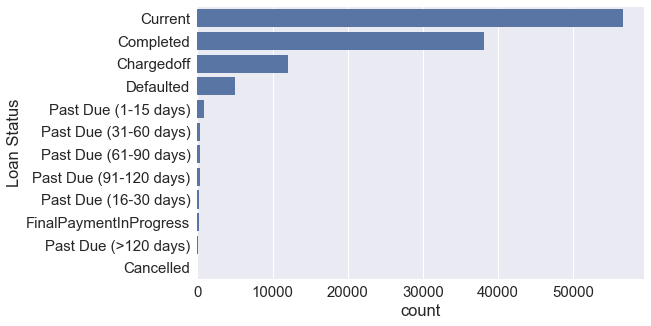

In [1285]:
# start with a standard-scaled plot
plt.figure(figsize=[8, 5])
base_color=sb.color_palette()[0]
LoanStatus_order=loans["LoanStatus"].value_counts().index
sb.countplot(data = loans, y = 'LoanStatus',color=base_color,order=LoanStatus_order)
plt.ylabel('Loan Status')
plt.show()

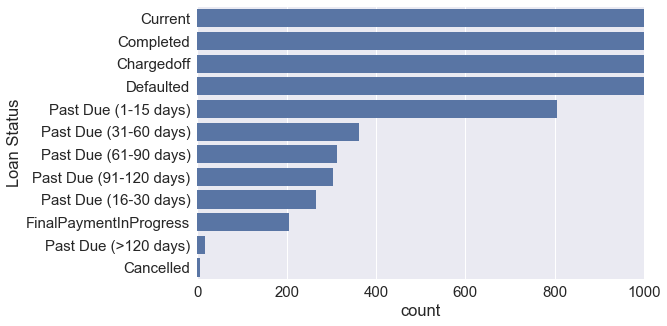

In [1286]:
# Since the count of a copule of columns is too high, we cannot see the count of other ones. 
# Let's zome in and see what is going on there. 
plt.figure(figsize=[8, 5])
base_color=sb.color_palette()[0]
LoanStatus_order=loans["LoanStatus"].value_counts().index
sb.countplot(data = loans, y = 'LoanStatus',color=base_color,order=LoanStatus_order)
plt.ylabel('Loan Status')
plt.xlim(0,1000)
plt.show() 

Well, that is interesting, some categories of Loan Status are really almost zero, such as Cancelled and Past Due (>120).

We can say the main categories of Loan Status are: "Completed", "Current", and "chargeoff" and the rest of categories has <1000 count

Next up, the first predictor variable of interest: Borrower Rate.

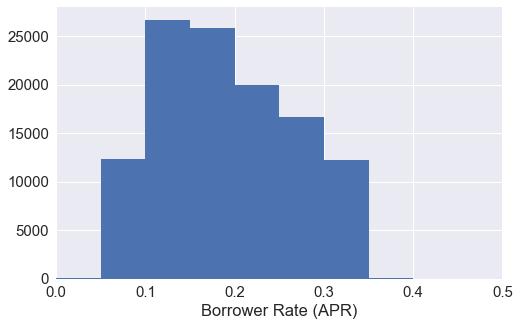

In [1287]:
# plotting Borrower Rate on a standard scale
binsize = 0.05
bins = np.arange(0, loans['BorrowerRate'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data=loans,x="BorrowerRate", bins = bins)
plt.xlim([0,0.5])
plt.xlabel('Borrower Rate (APR)')
plt.show() 

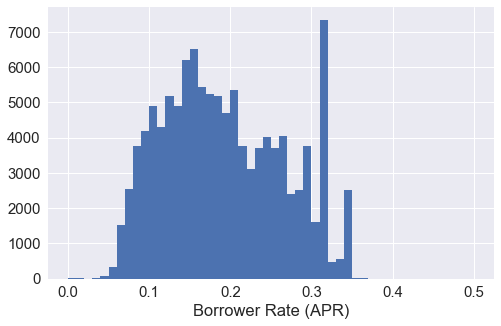

In [1288]:
# investigating further on an even smaller bin size
binsize = 0.01
bins = np.arange(0, loans['BorrowerRate'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data=loans,x="BorrowerRate", bins = bins)
#plt.xlim([0.31,0.32])
plt.xlabel('Borrower Rate (APR)')
plt.show()

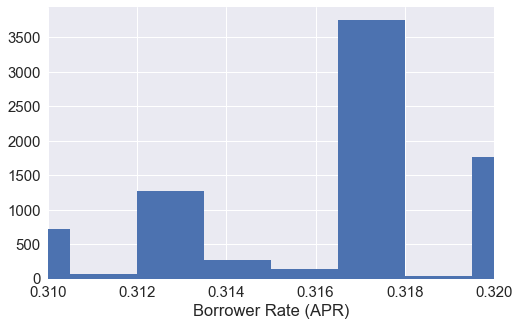

In [1289]:
# investigating further on an even smaller bin size
binsize = 0.0015
bins = np.arange(0, loans['BorrowerRate'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data=loans,x="BorrowerRate", bins = bins)
plt.xlim([0.31,0.32])
plt.xlabel('Borrower Rate (APR)')
plt.show()

At both large and small bin sizes the Borrower Rate seems to have a normal distrubution. So, I do not need to use any transformation. That is interesting that there is a sharp pick in between 0.316 and 0.317!

Next up, the first predictor variable of interest: Loan Original Amount.

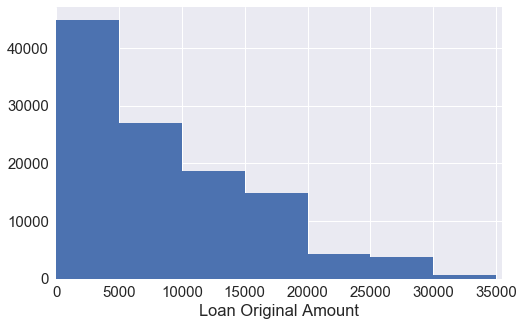

In [1290]:
# plotting Loan Original Amount on a standard scale
binsize = 5000
bins = np.arange(0, loans['LoanOriginalAmount'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data=loans,x="LoanOriginalAmount", bins = bins)
plt.xlim([0,35500])
plt.xlabel('Loan Original Amount')
plt.show() 

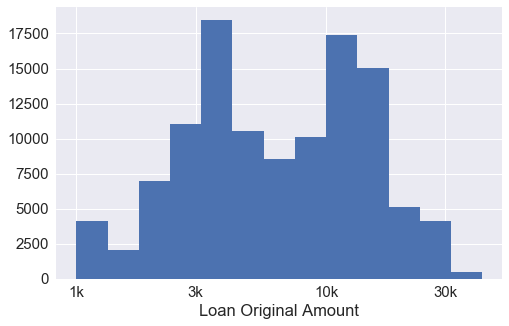

In [1291]:
# there's a long tail in the distribution, so let's put it on a log scale instead
log_binsize = 0.125
# To find the min and max use:
# np.log10(loans['LoanOriginalAmount'].describe())
bins = 10 ** np.arange(3.0, np.log10(loans['LoanOriginalAmount'].max())+log_binsize, log_binsize)
# min is: 3.000000 and max is: 4.544068. 
# so ticks could be calculated by min= 10**3.000000=1000 and max= 10**4.5=30000
ticks=[1000, 3000, 10000, 30000]
#labels= ["{}".format(v) for v in ticks]
labels=["1k", "3k", "10k","30k"]
plt.figure(figsize=[8, 5])
plt.hist(data = loans, x = 'LoanOriginalAmount', bins = bins)
plt.xscale('log')
plt.xticks(ticks,labels)
plt.xlabel('Loan Original Amount')
plt.show()

Loan Original Amount has a long-tailed distribution, with a lot of loans on the low "Loan Original Amount" end, and few on the high "Loan Original Amount" end. When plotted on a log-scale, the price distribution looks roughly bimodal, with one peak between 3000 and 4000, and a second peak a little below right after 10000.

Next up, the first predictor variable of interest: ProsperScore.

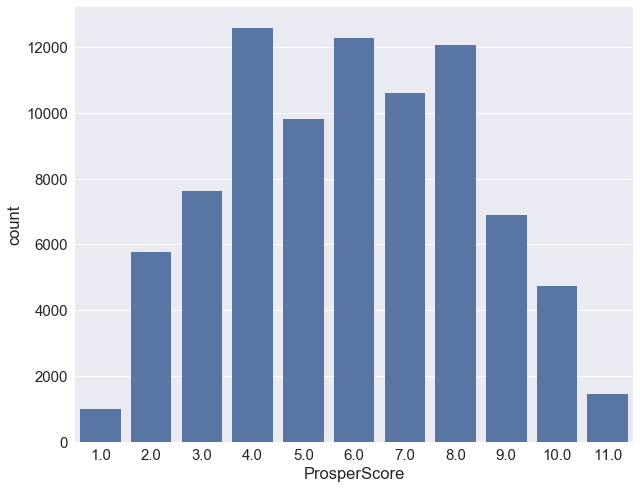

In [1292]:
# plotting Loan ProsperScore Amount on a standard scale
# The score ranges from 1-10, with 10 being the best, or lowest risk score.
# (worst) ——> 1,2,3,4,5,6,7,8,9,10,11
# ProsperScore: 1. 

# first the ProsperScore type should be changed to categorical! 
loans_ProsperScore_noNaN=loans.copy()
loans_ProsperScore_noNaN=loans_ProsperScore_noNaN[~loans_ProsperScore_noNaN['ProsperScore'].isnull()]

ordinal_var_dict={"ProsperScore":[1,2,3,4,5,6,7,8,9,10,11,12,13]}
for var in ordinal_var_dict:
    pd_ver=pd.__version__.split(".")
    if (int(pd_ver[0])>0) or (int(pd_ver[1])>=21): #v0.21 or later
        ordered_var=pd.api.types.CategoricalDtype(ordered=True,categories=ordinal_var_dict[var])
        loans_ProsperScore_noNaN[var]=loans_ProsperScore_noNaN[var].astype("category")
    else: # pre_v0.21
        loans_ProsperScore_noNaN[var]=loans_ProsperScore_noNaN.astype("category", 
                                                                     ordered=True,categories=ordinal_var_dict[var])
#plotting
plt.figure(figsize=[10, 8])
base_color=sb.color_palette()[0]
sb.countplot(data = loans_ProsperScore_noNaN, x = 'ProsperScore',color=base_color)
plt.xlabel('ProsperScore')
plt.show()

A custom risk score built using historical Prosper data. The score ranges from 1-10, with 10 being the best, or lowest risk score. ProsperScore is normally distributed. 

Next up, the first predictor variable of interest: BorrowerState.

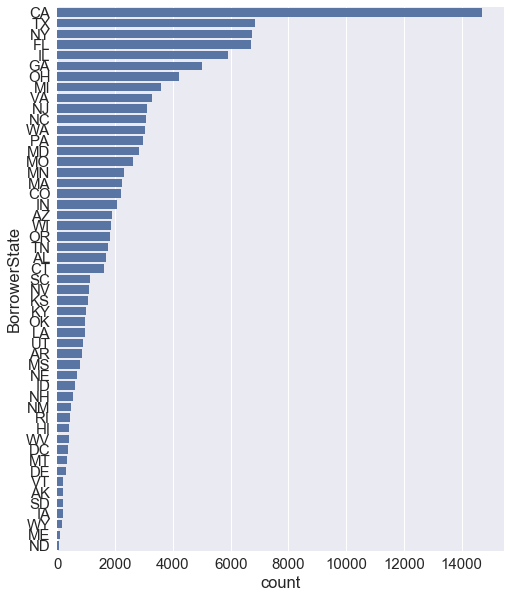

In [1293]:
# start with a standard-scaled plot
plt.figure(figsize=[8, 10])
base_color=sb.color_palette()[0]
BorrowerState_order=loans["BorrowerState"].value_counts().index
sb.countplot(data = loans, y = 'BorrowerState',color=base_color,order=BorrowerState_order)
plt.ylabel('BorrowerState')
plt.show()

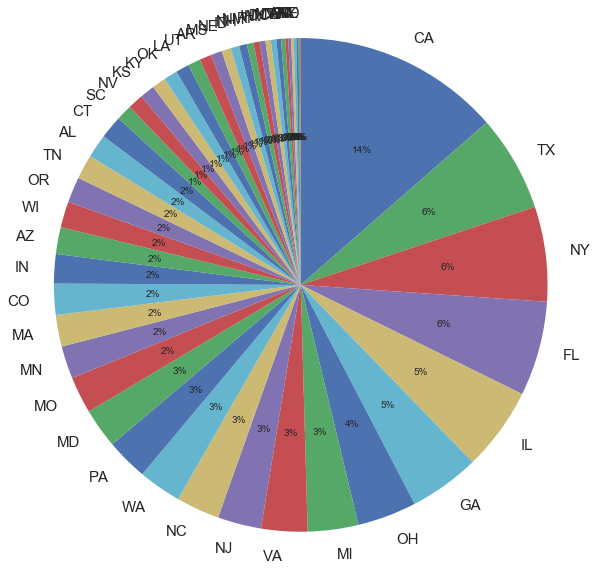

In [1294]:
plt.figure(figsize=[10,10])
stored_counts=loans["BorrowerState"].value_counts()
plt.pie(stored_counts, labels=stored_counts.index,startangle=90, counterclock=False,autopct='%1.0f%%');
plt.axis("square");

Apparently the number of loan borrower is much higher in CA (14%) than every other states, ~15000. After CA, the number of loan borrowers in GA, IL, FL, NY, and TX ranges between 5000 to 7000 (~5-6%) and all other states has <5000 borrowers. 

Next up, the first predictor variable of interest: Employment Status.

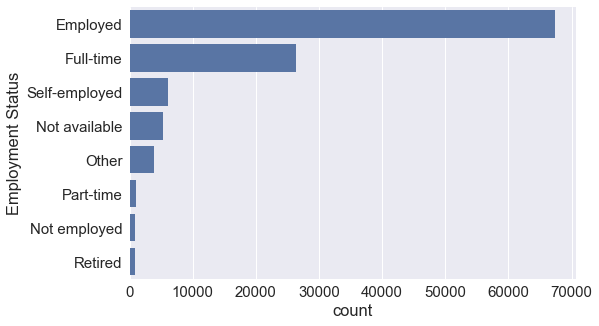

In [1295]:
#Employment Status
plt.figure(figsize=[8,5])
EmploymentStatus_order=loans["EmploymentStatus"].value_counts().index
base_color=sb.color_palette()[0]
sb.countplot(data = loans, y = 'EmploymentStatus',color=base_color, order=EmploymentStatus_order)
plt.ylabel('Employment Status')
plt.show()

By far, number of people who borrowed loans are emplyed, ~ 70,000. Besides ~28,000 of them are full time. The proportion of other categiories are less than 10000.

Next up, the first predictor variable of interest: EmploymentStatusDuration.

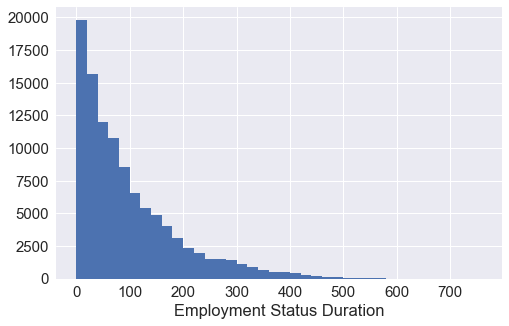

In [1296]:
#EmploymentStatusDuration
loans_EmploymentStatusDuration_noNaN=loans.copy()
loans_EmploymentStatusDuration_noNaN=loans_EmploymentStatusDuration_noNaN[~loans_EmploymentStatusDuration_noNaN['EmploymentStatusDuration'].isnull()]
loans_EmploymentStatusDuration_noNaN_noZero=loans_EmploymentStatusDuration_noNaN.query('EmploymentStatusDuration!=0')

binsize = 20
bins = np.arange(0, loans_EmploymentStatusDuration_noNaN_noZero['EmploymentStatusDuration'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data=loans_EmploymentStatusDuration_noNaN_noZero,x="EmploymentStatusDuration", bins = bins)
#plt.xlim([0,0.5])
plt.xlabel('Employment Status Duration')
plt.show()

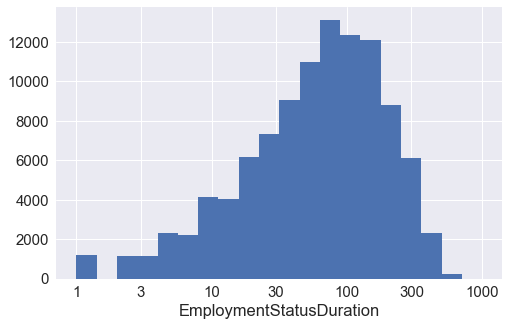

In [1297]:
# there's a long tail in the distribution, so let's put it on a log scale instead
log_binsize = 0.15
# To find the min and max use:
# np.log10(loans['LoanOriginalAmount'].describe())
bins = 10 ** np.arange(0, 3+log_binsize, log_binsize)
# min is: 3.000000 and max is: 4.544068. 
# so ticks could be calculated by min= 10**0.=1 and max= 10**3=1000
ticks=[1, 3, 10, 30, 100, 300,1000]
labels= ["{}".format(v) for v in ticks]
#labels=["1k", "3k", "10k","30k"]
plt.figure(figsize=[8, 5])
plt.hist(data = loans_EmploymentStatusDuration_noNaN_noZero, x = 'EmploymentStatusDuration', bins = bins)
plt.xscale('log')
plt.xticks(ticks,labels)
plt.xlabel('EmploymentStatusDuration')  
plt.show()

EmploymentStatusDuration has a long-tailed distribution, with a lot of loaners on the low EmploymentStatusDuration end, and few on the high EmploymentStatusDuration end. When plotted on a log-scale, the EmploymentStatusDuration distribution looks normally distributed with the highest peak between 50 and 200.

Next up, the first predictor variable of interest: Occupation.

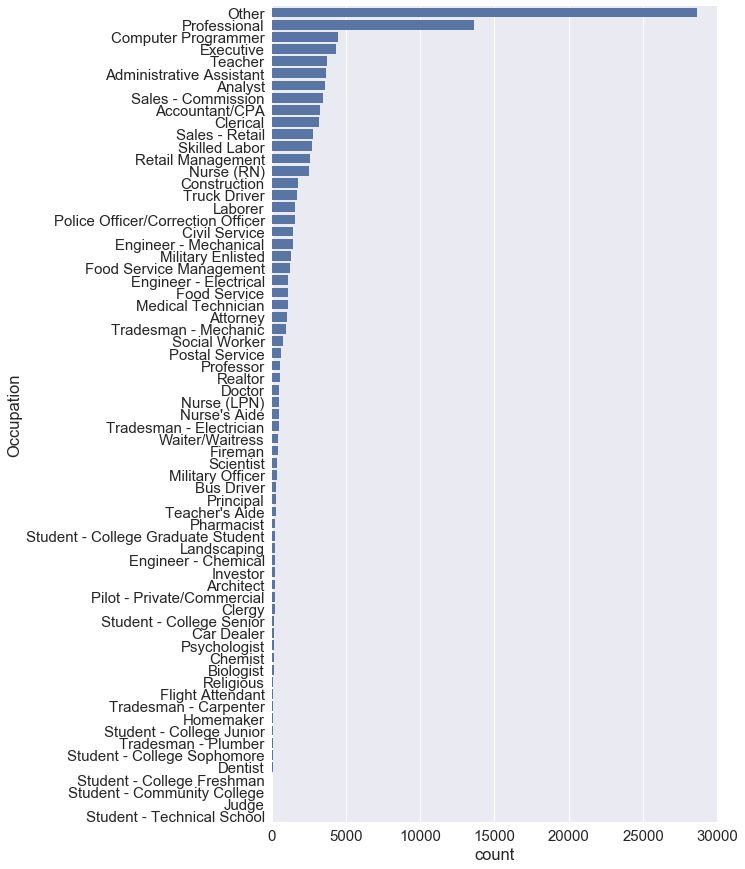

In [1298]:
#Occupation
plt.figure(figsize=[8,15])
Occupation_order=loans["Occupation"].value_counts().index
base_color=sb.color_palette()[0]
sb.countplot(data = loans, y = 'Occupation',color=base_color,order=Occupation_order)
plt.ylabel('Occupation')
plt.show()

In gerenral, studnets has the least number of loans.The mximum amount of loan belongs to "others" occupation, which I do not have any idea what it means! After "others, professionals with 15,000 are in the second place and all other jobs has <5000 number.

Next up, the first predictor variable of interest: CurrentCreditLines.

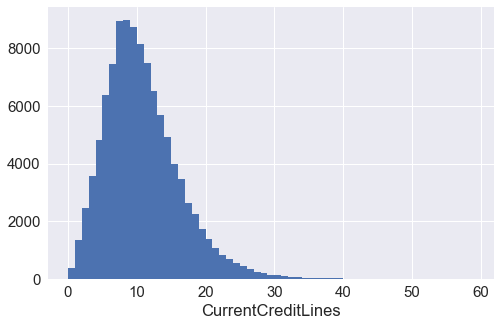

In [1299]:
loans_CurrentCreditLines_noNaN=loans.copy()
loans_CurrentCreditLines_noNaN=loans_CurrentCreditLines_noNaN[~loans_CurrentCreditLines_noNaN['CurrentCreditLines'].isnull()]
#loans_CurrentCreditLines_noNaN_noZero=loans_CurrentCreditLines_noNaN.query('EmploymentStatusDuration!=0')

binsize = 1
bins = np.arange(0, loans_CurrentCreditLines_noNaN['CurrentCreditLines'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data=loans_CurrentCreditLines_noNaN,x="CurrentCreditLines", bins = bins)
#plt.xlim([0,0.5])
plt.xlabel('CurrentCreditLines')
plt.show()

CurrentCreditLines is a little bit skewed to the right. But, it is almost normal distribution. 

Next up, the first predictor variable of interest: TotalCreditLinespast7years.

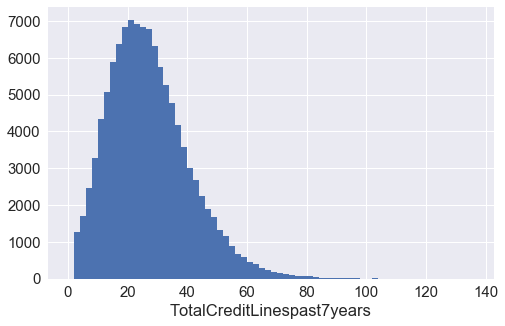

In [1300]:
#TotalCreditLinespast7years

loans_TotalCreditLinespast7years_noNaN=loans.copy()
loans_TotalCreditLinespast7years_noNaN=loans_TotalCreditLinespast7years_noNaN[~loans_TotalCreditLinespast7years_noNaN['TotalCreditLinespast7years'].isnull()]
loans_TotalCreditLinespast7years_noNaN_noZero=loans_TotalCreditLinespast7years_noNaN.query('TotalCreditLinespast7years!=0')

binsize = 2
bins = np.arange(0, loans_TotalCreditLinespast7years_noNaN_noZero['TotalCreditLinespast7years'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data=loans_TotalCreditLinespast7years_noNaN_noZero,x="TotalCreditLinespast7years", bins = bins)
#plt.xlim([0,0.5])
plt.xlabel('TotalCreditLinespast7years')
plt.show()

TotalCreditLinespast7years is a little bit skewed to the right. But, it is almost normal distribution. 


Next up, the first predictor variable of interest: OpenCreditLines.

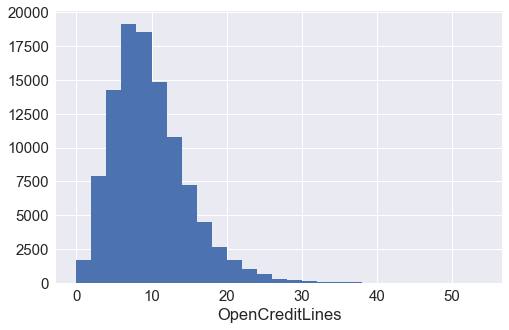

In [1301]:
# OpenCreditLines
loans_OpenCreditLines_noNaN=loans.copy()
loans_OpenCreditLines_noNaN=loans_OpenCreditLines_noNaN[~loans_OpenCreditLines_noNaN['OpenCreditLines'].isnull()]
loans_TotalCreditLinespast7years_noNaN_noZero=loans_OpenCreditLines_noNaN.query('OpenCreditLines!=0')


binsize = 2
bins = np.arange(0, loans_TotalCreditLinespast7years_noNaN_noZero['OpenCreditLines'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data=loans_TotalCreditLinespast7years_noNaN_noZero,x="OpenCreditLines", bins = bins)
#plt.xlim([0,0.5])
plt.xlabel('OpenCreditLines')
plt.show()

OpenCreditLines is a little bit skewed to the right. But, it is almost normal distribution. 

Next up, the first predictor variable of interest: DebtToIncomeRatio.

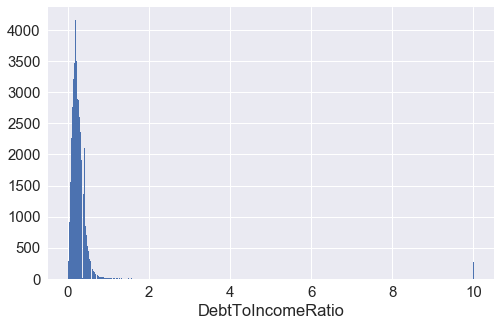

In [1302]:
#DebtToIncomeRatio
loans_DebtToIncomeRatio_noNaN=loans.copy()
loans_DebtToIncomeRatio_noNaN=loans_DebtToIncomeRatio_noNaN[~loans_DebtToIncomeRatio_noNaN['DebtToIncomeRatio'].isnull()]
loans_DebtToIncomeRatio_noNaN_noZero=loans_DebtToIncomeRatio_noNaN.query('DebtToIncomeRatio!=0')


binsize = 0.01

bins = np.arange(0, loans_DebtToIncomeRatio_noNaN_noZero['DebtToIncomeRatio'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data=loans_DebtToIncomeRatio_noNaN_noZero,x="DebtToIncomeRatio", bins = bins)
#plt.xlim([0,0.5])
plt.xlabel('DebtToIncomeRatio')
#plt.xlim(1,12)
plt.show()

The initial plot of the DebtToIncomeRatio show some immediate points of attention. Most of the data is set to the far left of their axes, suggesting some strong outliers on the right. It's worth taking a bit of time to identify these outliers and see if they need to be filtered out of the data.

In [1303]:
# select low outliers, using criteria eyeballed from the plots
high_outliers = (loans_DebtToIncomeRatio_noNaN_noZero['DebtToIncomeRatio'] > 1.5)

print(high_outliers.sum())
print(loans_DebtToIncomeRatio_noNaN_noZero.loc[high_outliers,:])

555
                     ListingKey  ListingNumber            ListingCreationDate  \
22      101735700321773921526BF         706927  2013-01-30 09:36:13.783000000   
226     2EA63382419173023274969         104542  2007-02-28 10:45:44.153000000   
368     00F033886616529869C3281         128819  2007-04-25 19:19:24.050000000   
576     3C18338635952151669AA4C         124494  2007-04-16 17:44:06.780000000   
626     45C73538911628429AAB1CD         560943  2012-02-20 16:08:45.633000000   
627     45C8355717032471171C0DA         631267  2012-08-29 11:45:28.977000000   
1242    029C3391969521662B80577         146341  2007-06-03 20:32:32.783000000   
1356    02803415966900900B282E0         294870  2008-03-17 19:28:44.040000000   
1620    02EF337006012144018CAD8          44986  2006-10-05 08:07:06.837000000   
1925    02F1339019841280370DC32         139992  2007-05-19 11:14:54.370000000   
2155    732F3484285076748E7CCDE         458811  2010-05-17 17:43:25.340000000   
2217    7FF3337948579237

In [1304]:
# well, there is around 555 outliers! I am not sure to remove them or not! If removing is necessary, this is the way:
# remove points with inconsistent depth values. 
loans_DebtToIncomeRatio_noNaN_noZero = loans_DebtToIncomeRatio_noNaN_noZero.loc[-high_outliers,:]

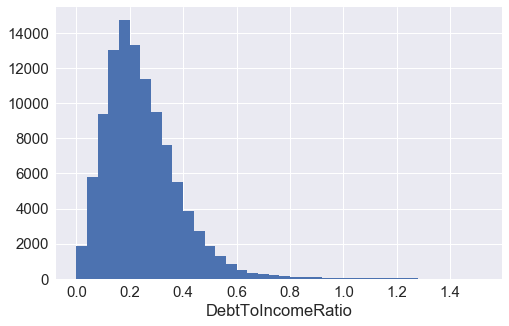

In [1305]:
binsize = 0.04

bins = np.arange(0, loans_DebtToIncomeRatio_noNaN_noZero['DebtToIncomeRatio'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data=loans_DebtToIncomeRatio_noNaN_noZero,x="DebtToIncomeRatio", bins = bins)
#plt.xlim([0,0.5])
plt.xlabel('DebtToIncomeRatio')
#plt.xlim(1,12)
plt.show()

DebtToIncomeRatio has uninomial distribution with a peak around 0.2

Next up, the first predictor variable of interest: IncomeRange_order.

In [1306]:
loans.IncomeRange.value_counts()

$25,000-49,999    32192
$50,000-74,999    31050
$100,000+         17337
$75,000-99,999    16916
Not displayed      7741
$1-24,999          7274
Not employed        806
$0                  621
Name: IncomeRange, dtype: int64

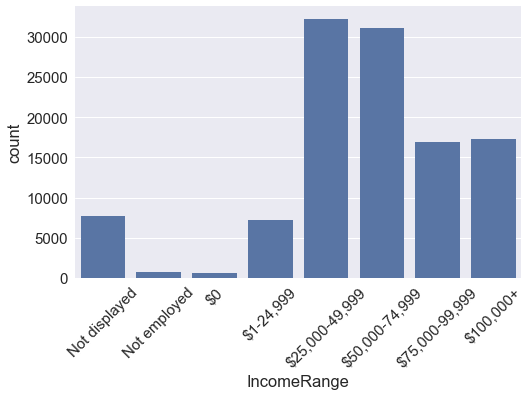

In [1332]:
#IncomeRange
plt.figure(figsize=[8, 5])
base_color=sb.color_palette()[0]
IncomeRange_order=["Not displayed", "Not employed", "$0","$1-24,999","$25,000-49,999",
                   "$50,000-74,999","$75,000-99,999","$100,000+" ]
sb.countplot(data = loans, x = 'IncomeRange',color=base_color,order=IncomeRange_order)
plt.xlabel('IncomeRange')
plt.xticks(rotation=45)
#plt.xlim(0,1000)
plt.show()

Clearly, most of ("$32,000")  loaners are have a salary of "$25,000-49,999" and "$50,000-74,999." After that, on the second level ("~$15,000"), laoners are making "$75,000-99,999" and "$100,000+." Rest of loaner, either are not employed, or making "<$25,000"

Next up, the first predictor variable of interest: Recommendations.

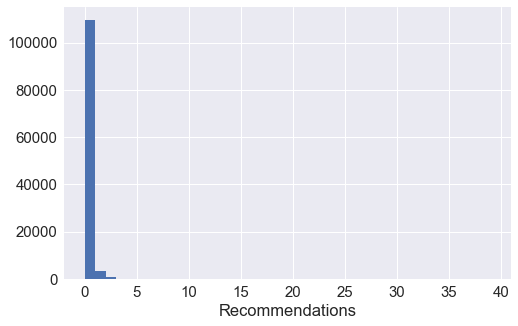

In [1308]:
#Recommendations
binsize = 1
bins = np.arange(0, loans['Recommendations'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data=loans,x="Recommendations", bins = bins)
#plt.xlim([0,4])
plt.xlabel('Recommendations')
plt.show()

Most of loaners has no recommenders. But there are a couple of outliers. 

In [1309]:
# outliers of Recommendations
print(loans.query('Recommendations>5').Recommendations.sum())
print(loans.query('Recommendations>5').Recommendations)

322
4470       9
8060      16
14716     39
15545     21
17717     16
23350      7
28057      9
50340     14
52890      8
54760      9
60934      9
62664      9
69534      7
70491      8
72601      8
74066      6
77747      7
79272      6
80738     24
84643      6
89587      7
90287      7
94485     19
94683      9
97675      6
106650    18
111736    18
Name: Recommendations, dtype: int64


There are 322 outliers! It is not a big deal I think, I will keep them for now.  

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

I looked at a couple of categorical and numerical variables. It is described below where log tranformation is used. 
   - **1. Categorical:** 
           LoanStatus
           ProsperScore
           BorrowerState
           EmploymentStatus
           Occupation
           IncomeRange   
   
   - **2. Numerical:**
   
        *2.1. Normal Distribution:*
            BorrowerRate (uninomial)
            CurrentCreditLines(uninomial)
            TotalCreditLinespast7years(uninomial)
            OpenCreditLines(uninomial)
            DebtToIncomeRatio(uninomial, has outliers)
            DebtToIncomeRatio(uninomial)
            Recommendations(uninomial, has outliers)
            
        *2.2. Log-Normal Distribution:* 
            LoanOriginalAmount (Binomial)
            EmploymentStatusDuration (uninomial)


### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

When investigating the OpenCreditLines and DebtToIncomeRatio variables, a number of outlier points were identified. Althought, it may be safer to remove these outliers, I kept them for now. However, I wrote the code for removing the outliers which later could be applied on the data. 

## Bivariate Exploration

> To start off with, I want to look at the pairwise correlations present between features in the data.

In [1310]:
ordinal_var_dict={"ProsperScore":[1,2,3,4,5,6,7,8,9,10,11,12,13]}
for var in ordinal_var_dict:
    pd_ver=pd.__version__.split(".")
    if (int(pd_ver[0])>0) or (int(pd_ver[1])>=21): #v0.21 or later
        ordered_var=pd.api.types.CategoricalDtype(ordered=True,categories=ordinal_var_dict[var])
        loans_noNAN[var]=loans_noNAN[var].astype("category")
    else: # pre_v0.21
        loans_noNAN[var]=loans_noNAN.astype("category", ordered=True,categories=ordinal_var_dict[var])

In [1311]:
numeric_vars = ['BorrowerRate', 'CurrentCreditLines', 'TotalCreditLinespast7years', 
                'OpenCreditLines', 'DebtToIncomeRatio', 
                'Recommendations','LoanOriginalAmount','EmploymentStatusDuration']

#categoric_vars = ['LoanStatus', 'ProsperScore', 'EmploymentStatus','BorrowerState','Occupation', 'IncomeRange']
categoric_vars1 = ['LoanStatus', 'ProsperScore', 'EmploymentStatus','IncomeRange']

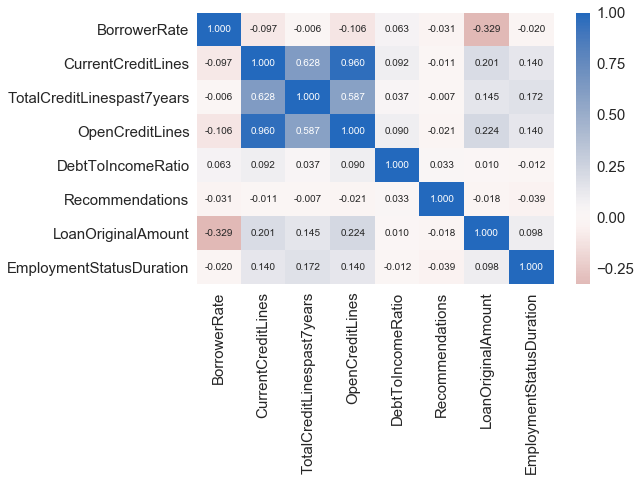

In [1312]:
# correlation plot
plt.figure(figsize = [8, 5])
sb.heatmap(loans[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

There is not a good correlation between most features. However, the correlation between:
    - OpenCreditLines and CurrentCreditLines is 0.96
    - CurrentCreditLines and TotalCreditLinespast7years is 0.628
    - OpenCreditLines and TotalCreditLinespast7years is 0.587
    
Besides, there is a negative relationship between 
LoanOrgingalAmount and BorrowRate

In [1313]:
loans.shape

(113937, 81)

In [1314]:
loans_noNAN=loans.copy()
loans_noNAN=loans_noNAN.dropna(subset=numeric_vars)
loans_noNAN.shape

(97886, 81)

C:\Users\pouya\Anaconda3\lib\site-packages\pandas\core\indexing.py:1472: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


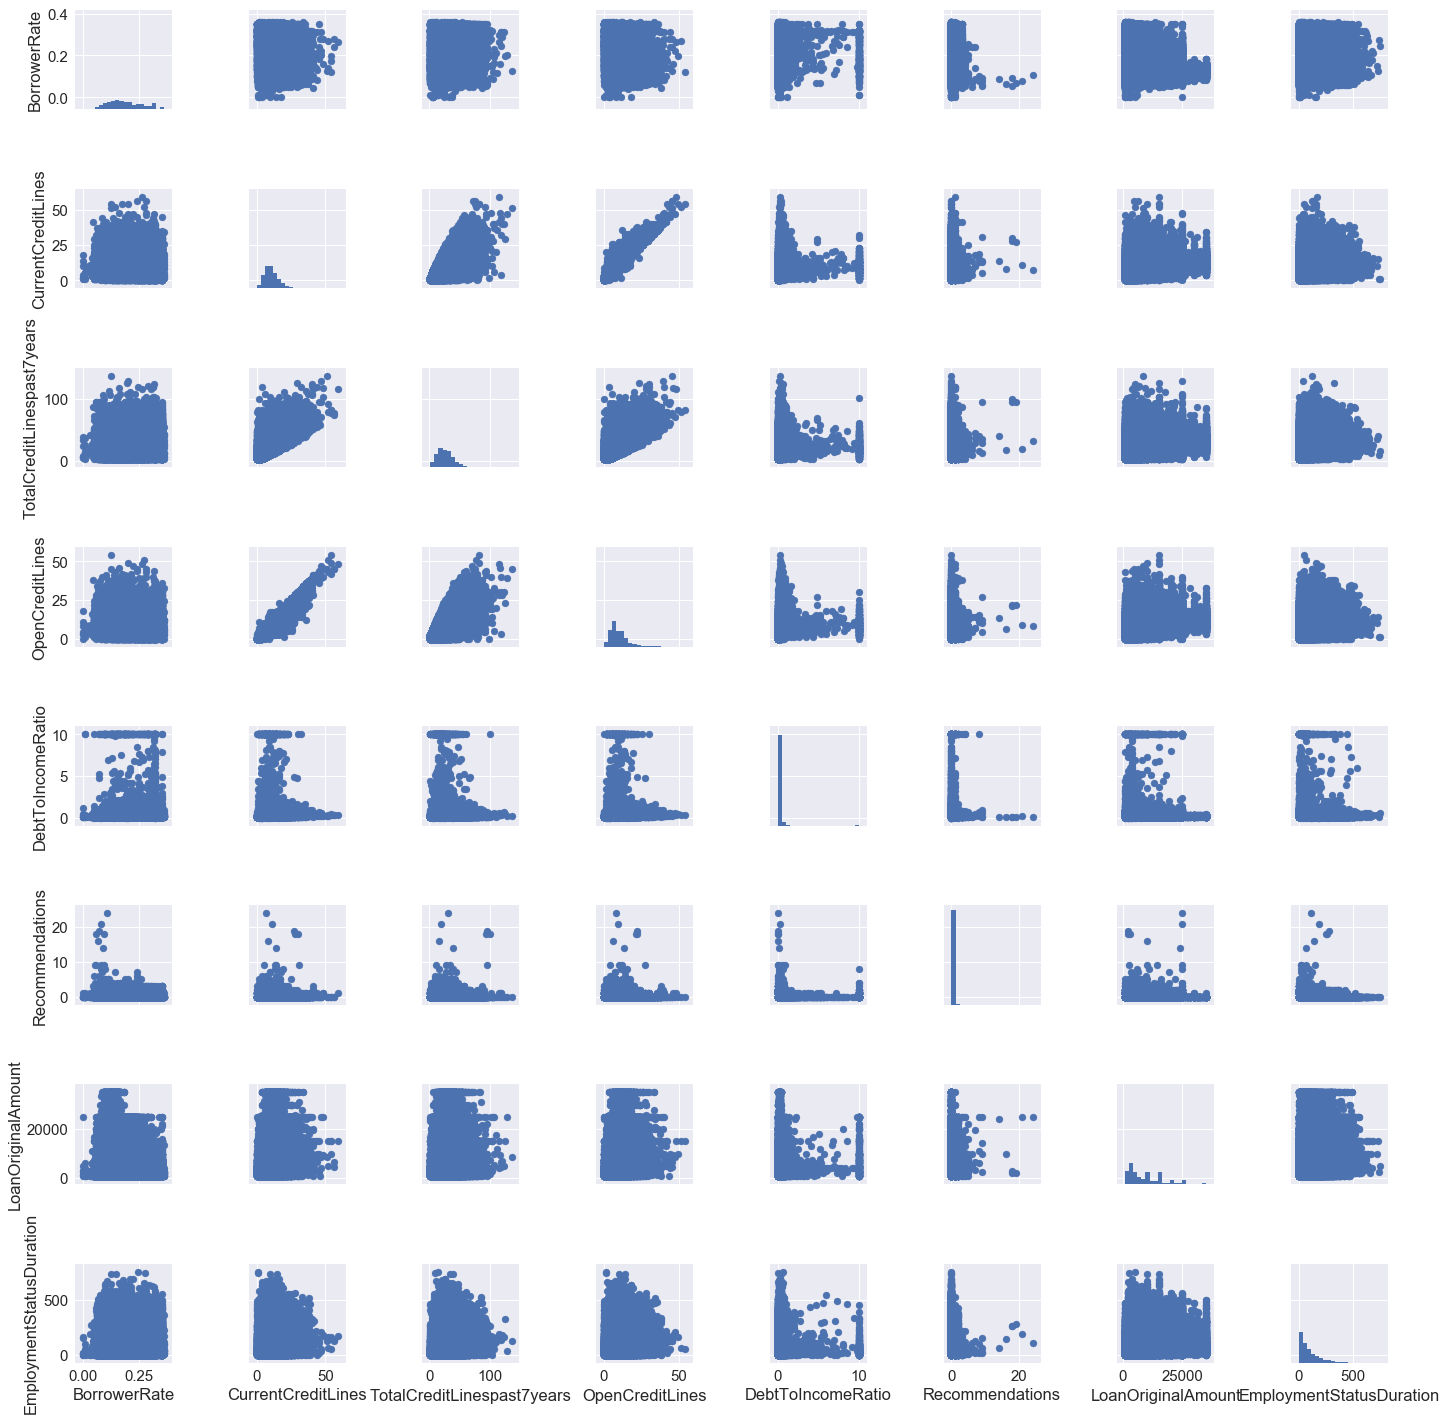

In [1315]:
# plot matrix: sample 500 diamonds so that plots are clearer and
# they render faster

samples = np.random.choice(loans_noNAN.shape[0], 500, replace = False)
loans_samp = loans_noNAN.loc[samples,:]

sb.set(font_scale = 1.5)
g = sb.PairGrid(data = loans_noNAN, vars = numeric_vars)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter);

As expected, most features are poorly correlated except OpenCreditLines, CurrentCreditLines and TotalCreditLinespast7years. 
The shown negative correlations in heatmap may not need any further analysis. 

Let's move on to looking at how numeric_vars correlate with the categorical variables.

C:\Users\pouya\Anaconda3\lib\site-packages\pandas\core\indexing.py:1472: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


<Figure size 720x720 with 0 Axes>

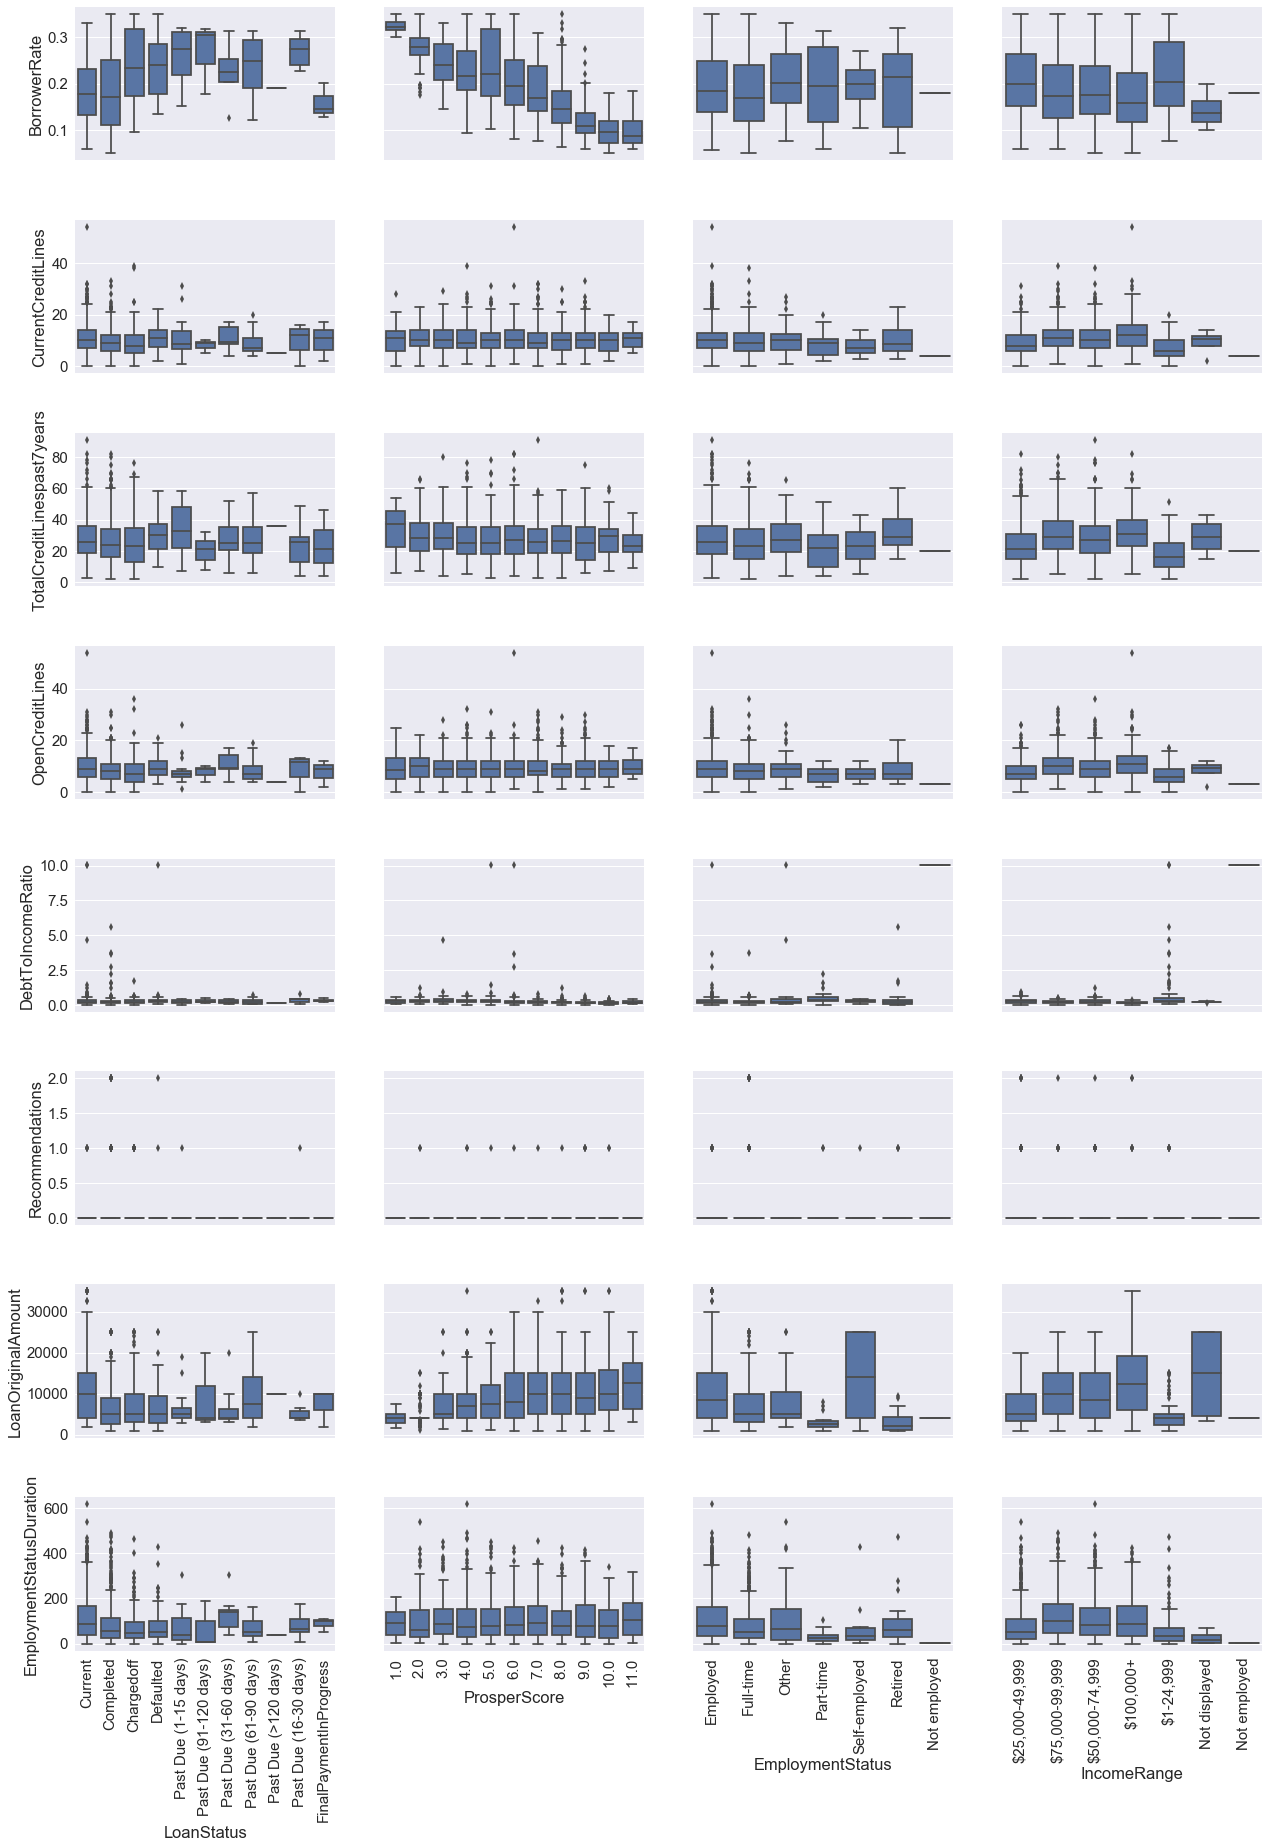

In [1316]:
# plot matrix of numeric features against categorical features.
# can use a larger sample since there are fewer plots and they're simpler in nature.

samples = np.random.choice(loans_noNAN.shape[0], 2000, replace = False)
diamonds_samp = loans_noNAN.loc[samples,:]

def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    default_color = sb.color_palette()[0]
    sb.boxplot(x, y, color = default_color)
    plt.xticks( rotation= 90 )

plt.figure(figsize = [10, 10])
g = sb.PairGrid(data = diamonds_samp, y_vars = numeric_vars,
                x_vars = categoric_vars1, size = 3, aspect = 1.5)

g.map(boxgrid);
plt.show();

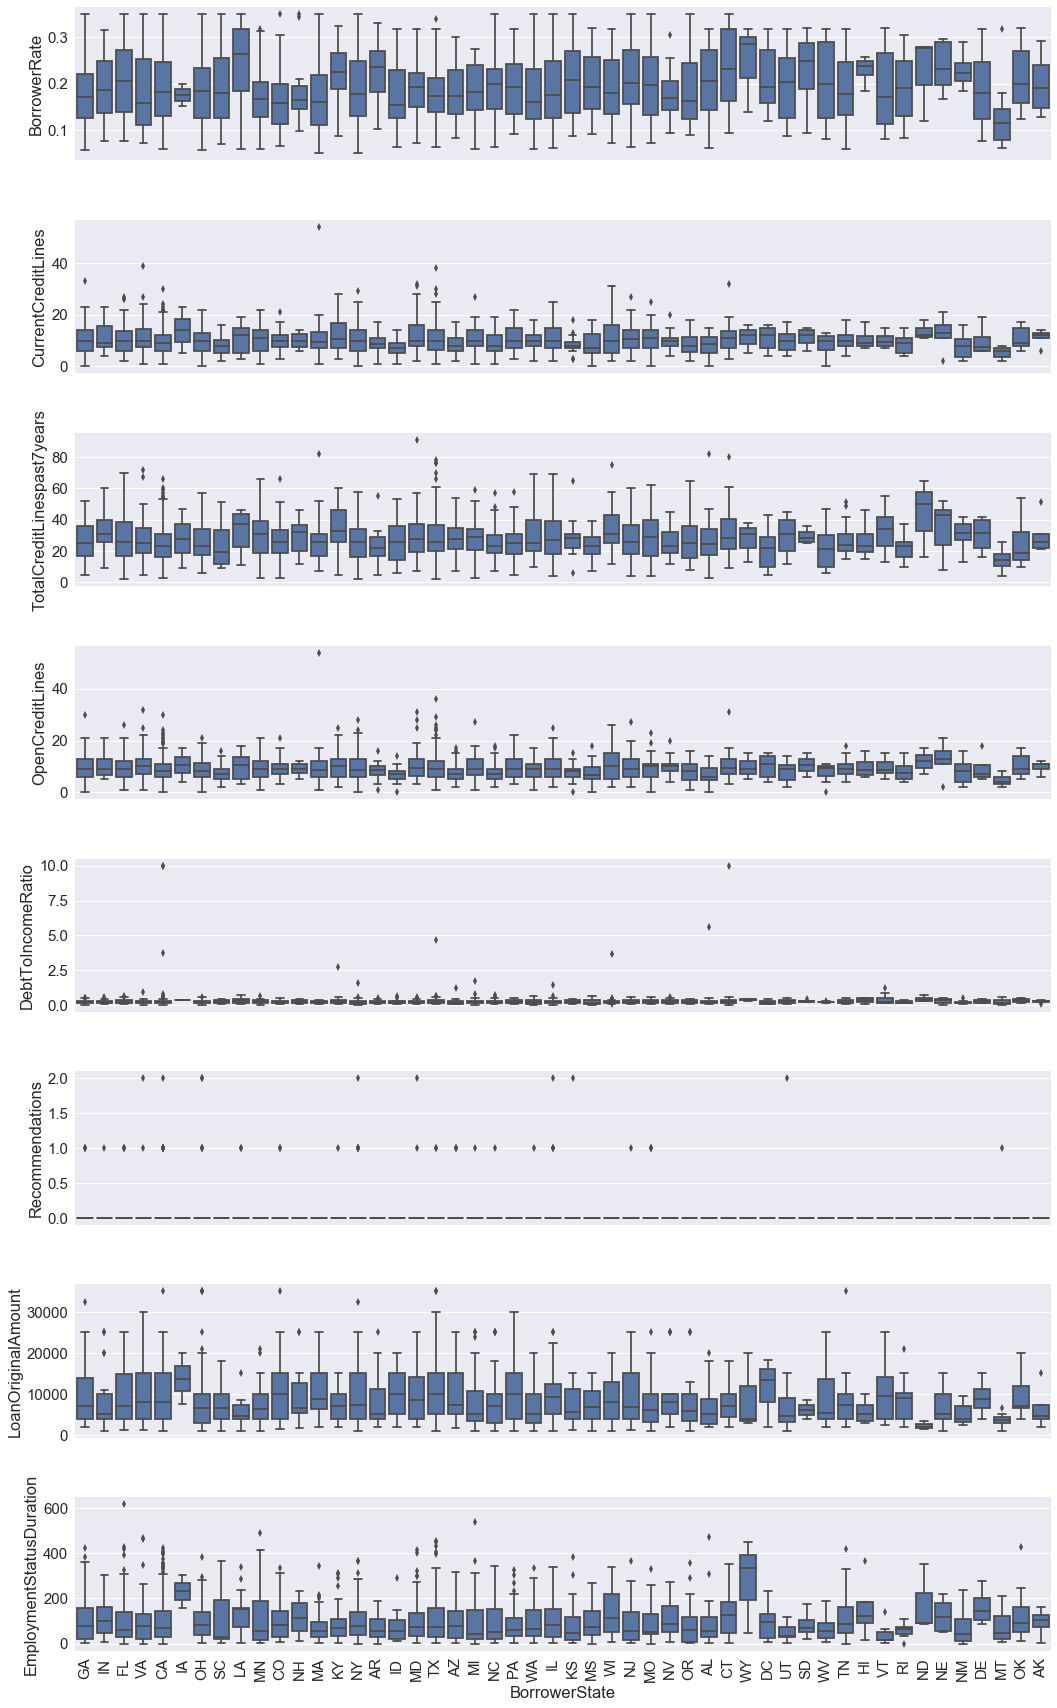

In [1317]:
g = sb.PairGrid(data = diamonds_samp, y_vars = numeric_vars,
                x_vars = "BorrowerState", size =3, aspect =5)
#categoric_vars2 = ['BorrowerState','Occupation']
g.map(boxgrid)
plt.show(); 

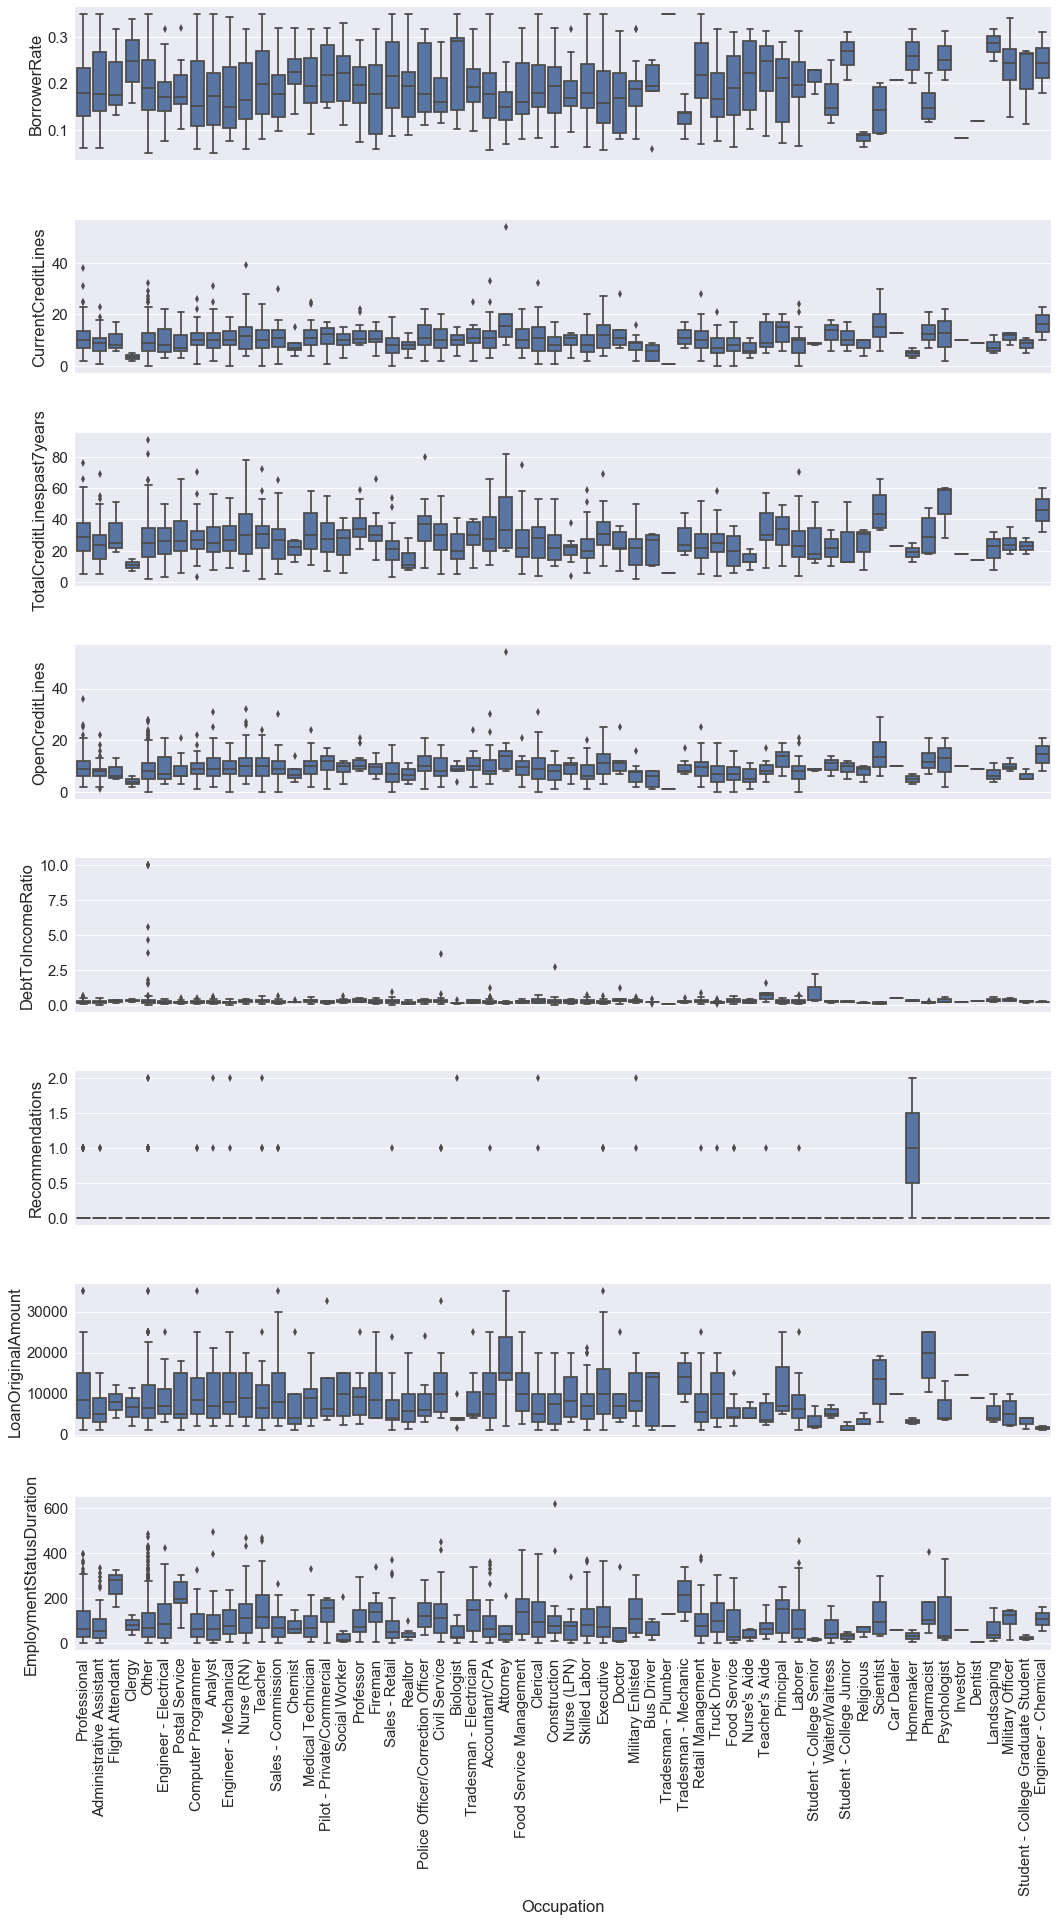

In [1318]:
g = sb.PairGrid(data = diamonds_samp, y_vars = numeric_vars,
                x_vars = "Occupation", size =3, aspect =5)
g.map(boxgrid)
plt.show();

Insights of categorical variables vs. numeric_vars
    1. 'LoanStatus': 
    No clear relationship
    
    2. 'ProsperScore': 
    negative rationship with BorrowerRate (increasing ProsperScore decreases the BorrowerRate), and positive relationship with LoanOriginalAmount
    
    3. 'EmploymentStatus':
    No clear relationship
    
    4. 'IncomeRange':
       *Positive relationship with:*
        CurrentCreditLines
        TotalCreditLinespast7years
        OpenCreditLines
        LoanOriginalAmount
    
       *Negative relationship with:*
        BorrowerRate
        
    5. 'BorrowerState':
    No clear relationship
    
    
    6. 'Occupation':
    No clear relationship

Finally, let's look at relationships between the 6 categorical features.

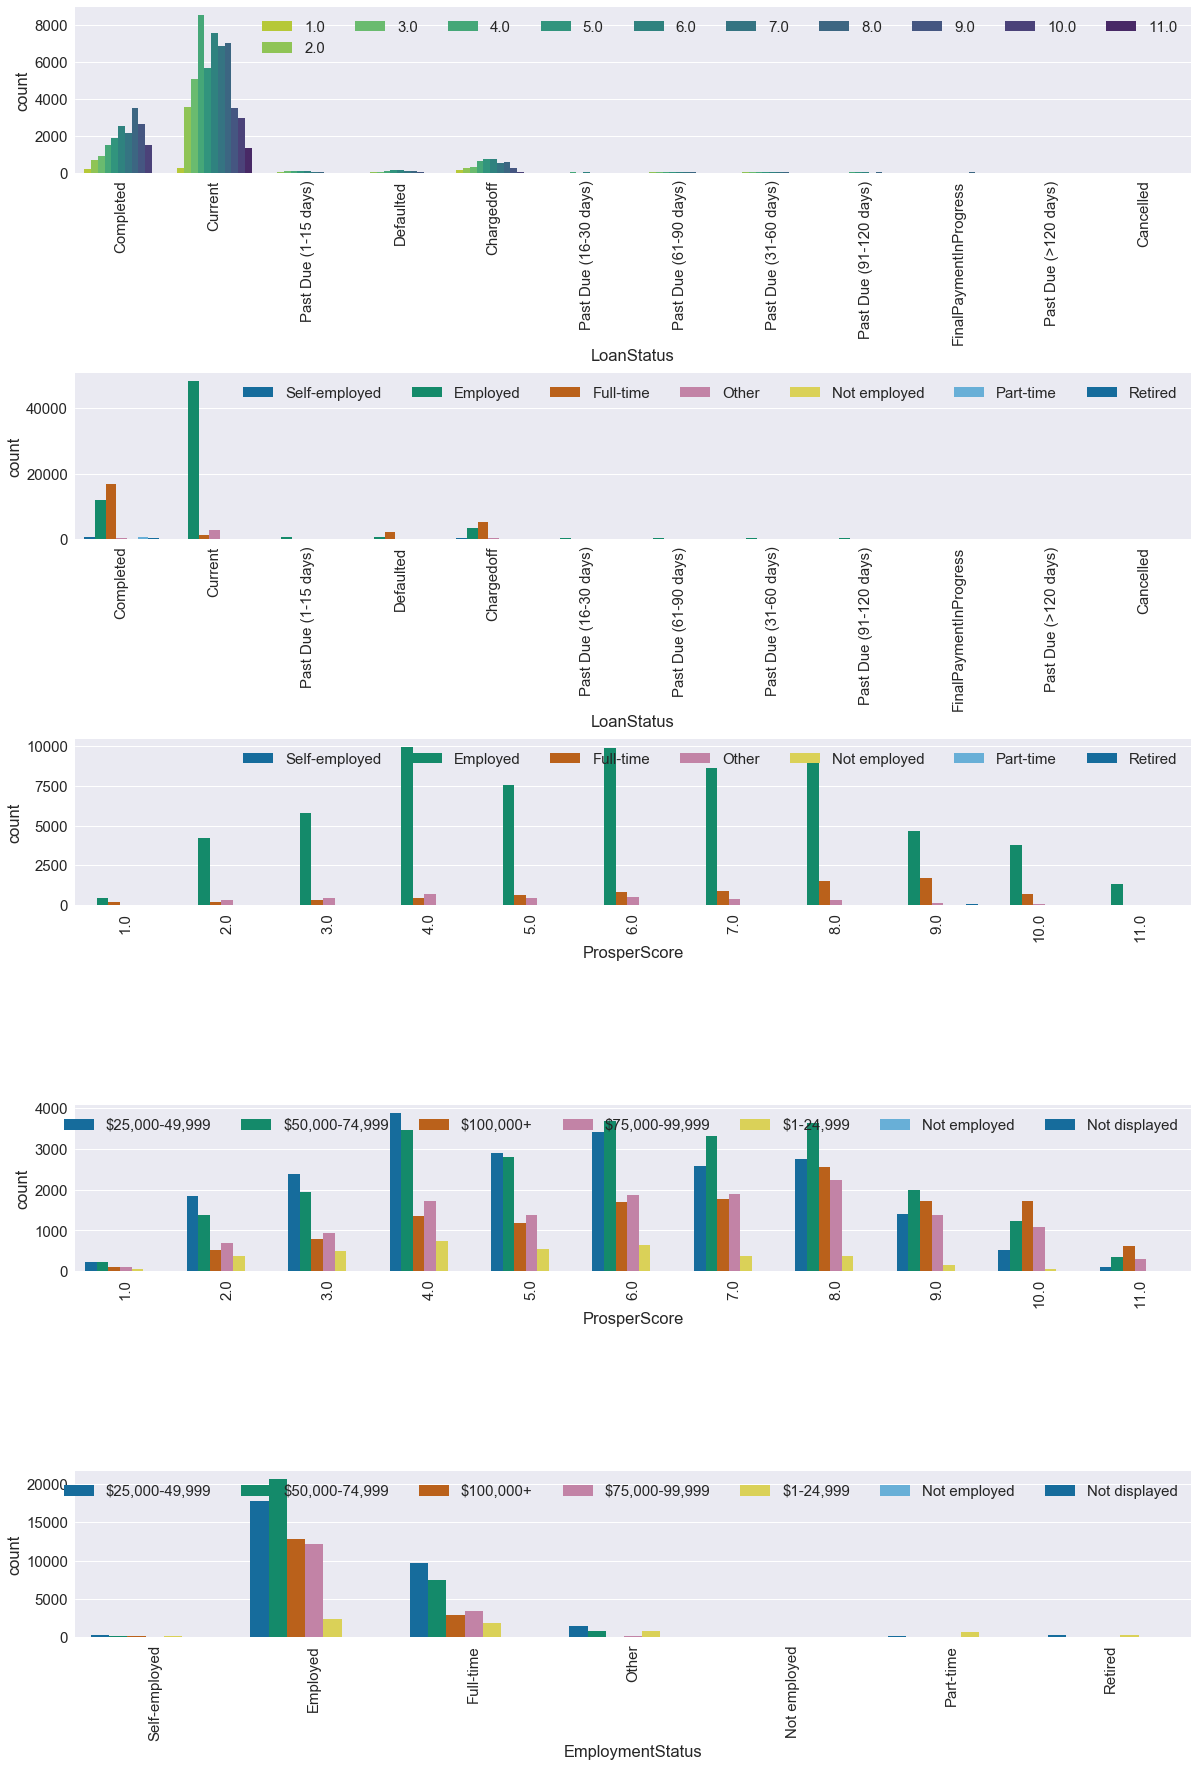

In [1319]:

#categoric_vars = ['LoanStatus', 'ProsperScore', 'EmploymentStatus','BorrowerState','Occupation', 'IncomeRange']
# since there's 15 subplots to create, using the full data should be fine.
plt.figure(figsize = [20, 30])
Rotation=90
ncolno=10
# subplot 1: 
ax1=plt.subplot(5, 1, 1)
sb.countplot(data = loans_noNAN, x = 'LoanStatus', hue = 'ProsperScore', palette = 'viridis_r')
ax1.legend(loc = 1, ncol = ncolno) # re-arrange legend to remove overlapping
plt.xticks(rotation=Rotation)

# subplot 2: 
ax2=plt.subplot(5, 1, 2)
sb.countplot(data = loans_noNAN, x = 'LoanStatus', hue = 'EmploymentStatus', palette = 'colorblind')
ax2.legend(loc = 1, ncol = ncolno) # re-arrange legend to reduce overlapping
plt.xticks(rotation=Rotation)

# subplot 3:
ax3  = plt.subplot(5, 1, 3)
sb.countplot(data = loans_noNAN, x = 'ProsperScore', hue = 'EmploymentStatus', palette = 'colorblind')
ax3.legend(loc = 1, ncol = ncolno) # re-arrange legend to reduce overlapping
plt.xticks(rotation=Rotation)

# subplot 4:
ax4= plt.subplot(5, 1, 4)
sb.countplot(data = loans_noNAN, x = 'ProsperScore', hue = 'IncomeRange', palette = 'colorblind')
ax4.legend(loc = 1, ncol = ncolno) # re-arrange legend to reduce overlapping
plt.xticks(rotation=Rotation)

# subplot 5:
ax5= plt.subplot(5, 1, 5)
sb.countplot(data = loans_noNAN, x = 'EmploymentStatus', hue = 'IncomeRange', palette = 'colorblind')
ax5.legend(loc = 1, ncol = ncolno) # re-arrange legend to reduce overlapping
plt.xticks(rotation=Rotation)

plt.subplots_adjust(hspace=1.2)
plt.show()

Insights of ategorical features versus each other:

Subplot 1: Most of those who completed their loans has a ProsperScore above 3. 
Most of those who currently has loan, has a ProsperScore of 4, and the minimum count of loaners belong to those who has a ProsperScore of 1. 

Subplot 2: Among those people who currenly has a loan, ~50,000 of them are employed. 

Subplot 3: the emplyed people are the most populated loan borrowers no matter what is their ProsperScore. If their ProsperScore is between 4 and 8, the the population of employed loan borrowers in each particular ProsperScore is between 6000 and 8000. 

Subplot 4: In ProsperScore of 2 to 10, the number of loaners who has a salary of 25-49k and 50-74k is more than others and if the ProsperScore is between 4 and 8, the popluation of both salries of 25-49k and 50-74k ranges are above 2500. 

Subplot 5: Among those people who are employed, respectively the most popluated salary ranges are: 50-75k, 25-49k, >100k and 75-99k 


In [1320]:
#categoric_vars = ['LoanStatus', 'ProsperScore', 'EmploymentStatus','BorrowerState','Occupation', 'IncomeRange']
# since there's 15 subplots to create, using the full data should be fine.
#plt.figure(figsize = [20, 60])
#Rotation=90
#ncolno=10
# subplot 1: 
#x1=plt.subplot(15, 1, 1)
#sb.countplot(data = loans_noNAN, x = 'LoanStatus', hue = 'ProsperScore', palette = 'viridis_r')
#ax1.legend(loc = 1, ncol = ncolno) # re-arrange legend to remove overlapping
#plt.xticks(rotation=Rotation)

# subplot 2: 
#ax2=plt.subplot(15, 1, 2)
#sb.countplot(data = loans_noNAN, x = 'LoanStatus', hue = 'EmploymentStatus', palette = 'deep')
#ax2.legend(loc = 1, ncol = ncolno) # re-arrange legend to reduce overlapping
#plt.xticks(rotation=Rotation)

#subplot 3: 
#ax3 = plt.subplot(15, 1, 3)
#sb.countplot(data = loans_noNAN, x = 'LoanStatus', hue = 'BorrowerState', palette = 'pastel')
#ax3.legend(loc = 1, ncol = ncolno) # re-arrange legend to reduce overlapping
#plt.xticks(rotation=Rotation)

#ax4 = plt.subplot(15, 1, 4)
#sb.countplot(data = loans_noNAN, x = 'LoanStatus', hue = 'Occupation', palette = 'dark')
#ax4.legend(loc = 1, ncol = ncolno) # re-arrange legend to reduce overlapping
#plt.xticks(rotation=Rotation)

#ax5 = plt.subplot(15, 1, 5)
#sb.countplot(data = loans_noNAN, x = 'LoanStatus', hue = 'IncomeRange', palette = 'bright')
#ax5.legend(loc = 1, ncol = ncolno) # re-arrange legend to reduce overlapping
#plt.xticks(rotation=Rotation)

#ax6  = plt.subplot(15, 1, 6)
#sb.countplot(data = loans_noNAN, x = 'ProsperScore', hue = 'EmploymentStatus', palette = 'colorblind_r')
#ax6.legend(loc = 1, ncol = ncolno) # re-arrange legend to reduce overlapping
#plt.xticks(rotation=Rotation)

#ax7  = plt.subplot(15, 1, 7)
#sb.countplot(data = loans_noNAN, x = 'ProsperScore', hue = 'BorrowerState', palette = 'Greens')
#ax7.legend(loc = 1, ncol = ncolno) # re-arrange legend to reduce overlapping
#plt.xticks(rotation=Rotation)

#ax8 = plt.subplot(15, 1, 8)
#sb.countplot(data = loans_noNAN, x = 'ProsperScore', hue = 'Occupation', palette = 'Greens')
#ax8.legend(loc = 1, ncol = ncolno) # re-arrange legend to reduce overlapping
#plt.xticks(rotation=Rotation)

#ax9= plt.subplot(15, 1, 9)
#sb.countplot(data = loans_noNAN, x = 'ProsperScore', hue = 'IncomeRange', palette = 'deep')
#ax9.legend(loc = 1, ncol = ncolno) # re-arrange legend to reduce overlapping
#plt.xticks(rotation=Rotation)

#ax10 = plt.subplot(15, 1, 10)
#sb.countplot(data = loans_noNAN, x = 'EmploymentStatus', hue = 'BorrowerState', palette = 'pastel')
#ax10.legend(loc = 1, ncol = ncolno) # re-arrange legend to reduce overlapping
#plt.xticks(rotation=Rotation)

#ax11 = plt.subplot(15, 1, 11)
#sb.countplot(data = loans_noNAN, x = 'EmploymentStatus', hue = 'Occupation', palette = 'Greens')
#ax11.legend(loc = 1, ncol = ncolno) # re-arrange legend to reduce overlapping
#plt.xticks(rotation=Rotation)

#ax12= plt.subplot(15, 1, 12)
#sb.countplot(data = loans_noNAN, x = 'EmploymentStatus', hue = 'IncomeRange', palette = 'pastel_r')
#ax12.legend(loc = 1, ncol = ncolno) # re-arrange legend to reduce overlapping
#plt.xticks(rotation=Rotation)

#ax13 = plt.subplot(15, 1, 13)
#sb.countplot(data = loans_noNAN, x = 'BorrowerState', hue = 'Occupation', palette = 'Greens')
#ax13.legend(loc = 1, ncol = ncolno) # re-arrange legend to reduce overlapping
#plt.xticks(rotation=Rotation)

#ax14 =  plt.subplot(15, 1, 14)
#sb.countplot(data = loans_noNAN, x = 'BorrowerState', hue = 'IncomeRange', palette = 'Greens')
#ax14.legend(loc = 1, ncol = ncolno) # re-arrange legend to reduce overlapping
#plt.xticks(rotation=Rotation)

#ax15 = plt.subplot(15, 1, 15)
#sb.countplot(data = loans_noNAN, x = 'Occupation', hue = 'IncomeRange', palette = 'Greens')
#ax15.legend(loc = 1, ncol = ncolno) # re-arrange legend to reduce overlapping
#plt.xticks(rotation=Rotation)

#plt.subplots_adjust(hspace=1)
#plt.show()

With the preliminary look at bivariate relationships out of the way, I want to dig into some of the relationships more. 
    
    Scatter:
    - BorrowerRate (numeric) vs. LoanOriginalAmount (numeric)
    - BorrowerRate (numeric) vs. TotalCreditLinespast7years (numeric)

    Violin:
    - BorrowerRate (numeric) vs. IncomeRange (categoric_vars)
    
    Cluster bar chart:
    - LoanStatus (categoric) vs. EmploymentStatus (categoric)
    - LoanStatus (categorical) vs. ProsperScore (categoric)


C:\Users\pouya\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  app.launch_new_instance()


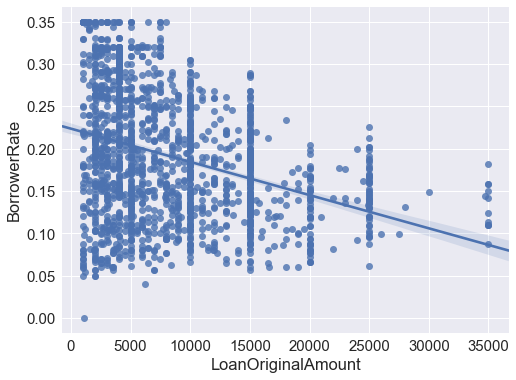

In [1321]:
# scatter plot of BorrowerRate (numeric) vs. LoanOriginalAmount (numeric)
sample=np.random.choice(loans_noNAN.shape[0],2000, replace=False)
loans_noNAN_subset=loans_noNAN.loc[sample]
plt.figure(figsize = [8, 6])
sb.regplot(data = loans_noNAN_subset, x = 'LoanOriginalAmount', y= 'BorrowerRate')
plt.xlabel('LoanOriginalAmount')
plt.ylabel('BorrowerRate')
plt.show()

The graph shows that by increasing LoanOriginalAmount, BorrowerRate decreases which is along with the results of first bivariable graph (HeatMap Graph). 

C:\Users\pouya\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  app.launch_new_instance()


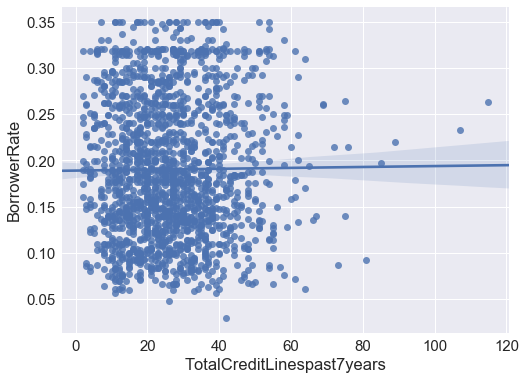

In [1322]:
# scatter plot of BorrowerRate (numeric) vs. TotalCreditLinespast7years (numeric)
sample=np.random.choice(loans_noNAN.shape[0],2000, replace=False)
loans_noNAN_subset=loans_noNAN.loc[sample]
plt.figure(figsize = [8, 6])
sb.regplot(data = loans_noNAN_subset, x = 'TotalCreditLinespast7years', y= 'BorrowerRate')
plt.xlabel('TotalCreditLinespast7years')
plt.ylabel('BorrowerRate')
plt.show()

It seems that TotalCreditLinespast7years does not affect the BorrowerRate.

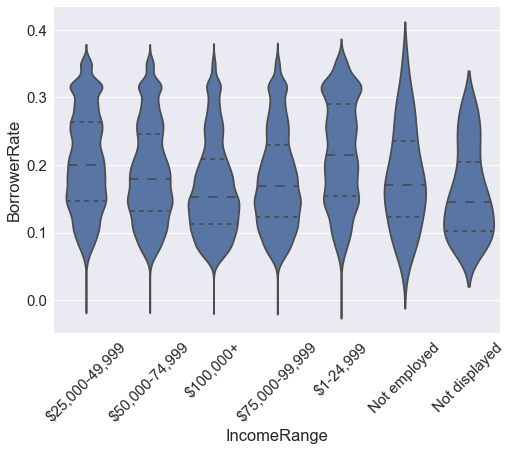

In [1323]:
# violin plot of BorrowerRate (numeric) vs. IncomeRange (categoric_vars)
plt.figure(figsize = [8, 6])
base_color=sb.color_palette()[0]
sb.violinplot(data = loans_noNAN, x = 'IncomeRange', y= 'BorrowerRate',color=base_color, inner="quartile");
plt.xticks(rotation=45);

The plot of the full data using a violin plot suggests that changing income range does not affect the borrow rate and the mean of all borrow rates in different income ranges is ~0.15-0.21 

<Figure size 1440x1440 with 0 Axes>

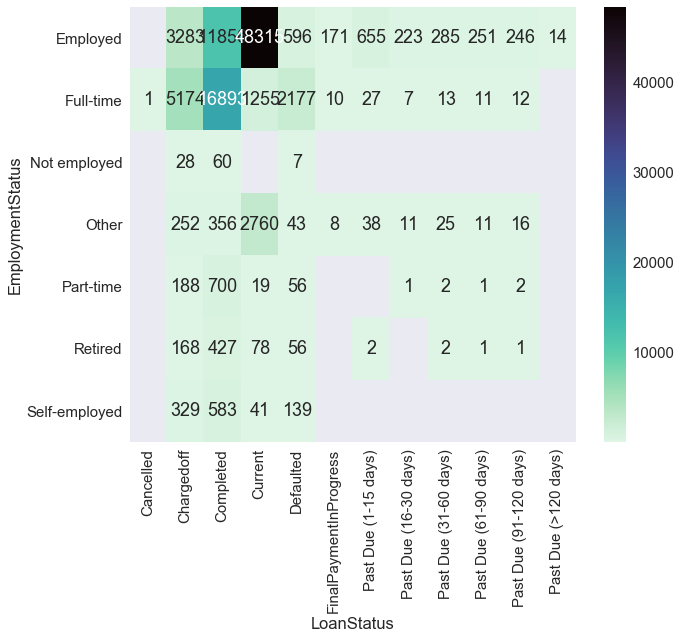

In [1324]:
# Heatmap for:EmploymentStatus (categoric), LoanStatus (categorical) 
plt.figure(figsize = [20, 20])
ct_counts=loans_noNAN.groupby(["EmploymentStatus", 'LoanStatus']).size().reset_index(name="count")
ct_counts=ct_counts.pivot(index="EmploymentStatus", columns="LoanStatus", values="count")
#ct_counts.fillna(value="0", inplace=True)
ct_counts = ct_counts[ct_counts.columns].astype(float)

plt.figure(figsize = [10,8])
#sb.heatmap(ct_counts,cmap="viridis_r");
sb.heatmap(ct_counts,annot=True,fmt='.0f',cmap="mako_r");

Above graph shows that the number of people with emplyed and full time status  who currently have a loan or completed their laons is much higher than other people with other employment status. 

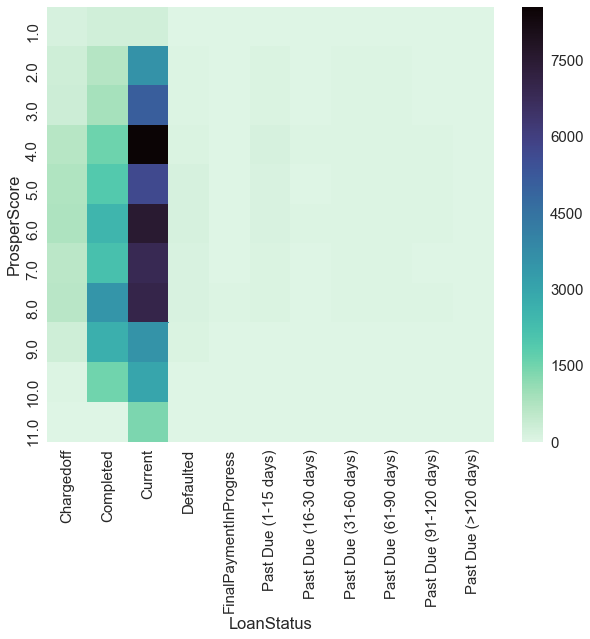

In [1325]:
ct_counts=loans_noNAN.groupby(["ProsperScore", 'LoanStatus']).size().reset_index(name="count")
ct_counts=ct_counts.pivot(index="ProsperScore", columns="LoanStatus", values="count")
ct_counts.fillna(value="0", inplace=True)
ct_counts = ct_counts[ct_counts.columns].astype(float)

plt.figure(figsize = [10,8])
sb.heatmap(ct_counts,cmap="mako_r");
#sb.heatmap(ct_counts,annot=True,fmt='0.1f',cmap="mako_r");

Above graph shows that 1. in this data most people currenly have a loan or completed their loans and their interest rate is ~4-8.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Most of those who completed their loans has a ProsperScore above 3. Most of those who currently has loan, has a ProsperScore of 4, and the minimum count of loaners belong to those who has a ProsperScore of 1. The majority (~50,000) of people
who currenly has a loan are emplyed no matter what is their ProsperScore. If their ProsperScore is between 4 and 8, the population of employed loan borrowers in each particular ProsperScore is between 6000 and 8000. In ProsperScore of 2 to 8, the number of loaners who has a salary of 25-49k and 50-74k is more than others salary groups and if the ProsperScore is between 4 and 8, the popluation of both salries of 25-49k and 50-74k groups ranges between 2500 and 3900. 
Plots also show that BorrowerRate has a negative relationship with LoanOriginalAmount and has a postive relationship with ProsperScore. IncomeRange also affect the LoanOriginalAmount in a positive way. The plot of the full data using a violin plot suggests that borrow rate is independant of income range and ranges ~0.15-0.21 


### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> There is a positive relationshi between ProsperScore and LoanOriginalAmount. The number of people with emplyed and full time status  who currently have a loan or completed their laons is much higher than other people with other employment status. In this data, most people currenly have a loan or completed their loans, and their interest rates is ~4-8.

## Multivariate Exploration

> The main thing I want to explore in this part of the analysis is how the three categorical measures of TotalCreditLinespast7years and IncomeRange play into the relationship between BorrowerRate and LoanOriginalAmount.

C:\Users\pouya\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  app.launch_new_instance()


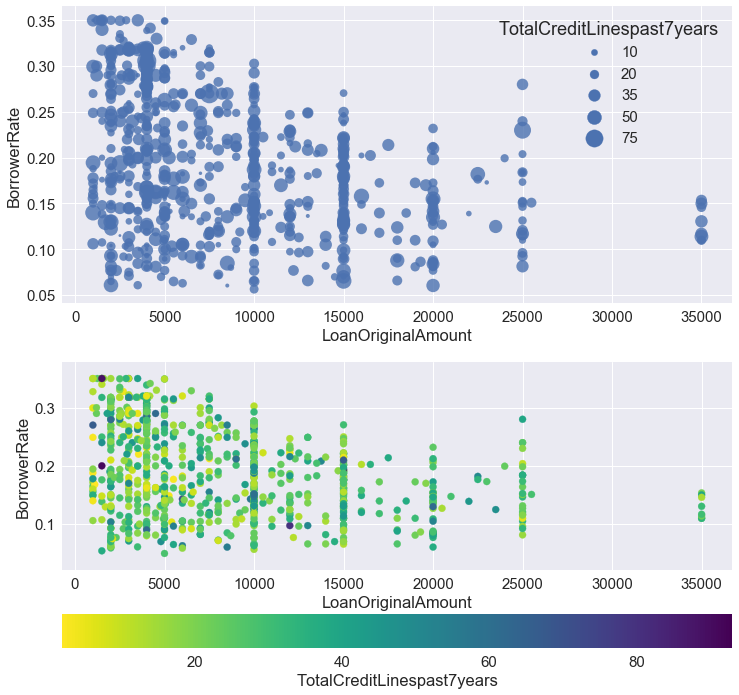

In [1340]:
#np.random.seed(2018)
sample=np.random.choice(loans_noNAN.shape[0],1000, replace=False)
loans_noNAN_subset=loans_noNAN.loc[sample]

plt.figure(figsize = [12,12])
plt.subplot(2,1,1)
ax1=sb.regplot(data=loans_noNAN_subset,x="LoanOriginalAmount",y="BorrowerRate",
          x_jitter=0.04, fit_reg=False,
          scatter_kws={'s':loans_noNAN_subset["TotalCreditLinespast7years"]*4})
plt.xlabel("LoanOriginalAmount")
plt.ylabel("BorrowerRate")
sizes=[10, 20, 35,50, 75]
base_color=sb.color_palette()[0]
legend_obj=[]
for s in sizes:
    legend_obj.append(plt.scatter([],[],s=s*4,color=base_color))
plt.legend(legend_obj,sizes,title="TotalCreditLinespast7years");

plt.subplot(2,1,2)
ax2=plt.scatter(data=loans_noNAN_subset,x="LoanOriginalAmount",y="BorrowerRate",
            c="TotalCreditLinespast7years", cmap="viridis_r")
plt.xlabel("LoanOriginalAmount")
plt.ylabel("BorrowerRate")
plt.colorbar(label="TotalCreditLinespast7years",orientation="horizontal");
#plt.ylim(ax1.get_ylim()); # to get exactly the same y lim as the previous subplot


I tried using both size and color to find the effect of TotalCreditLinespast7years in a scatter plot of BorrowerRate vs. LoanOriginalAmount. As it is shown, TotalCreditLinespast7years does not play a significant role on controling the BorrowerRate and LoanOriginalAmount relationship. 

C:\Users\pouya\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  app.launch_new_instance()


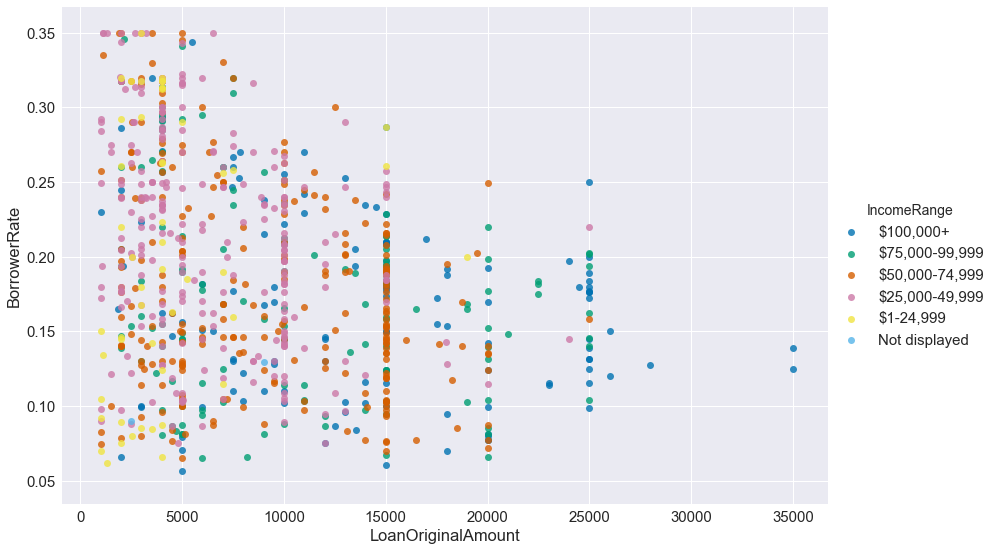

In [1327]:
#np.random.seed(18)
sample=np.random.choice(loans_noNAN.shape[0],1000, replace=False)
loans_noNAN_subset=loans_noNAN.loc[sample]
IncomeRange_order=[ "$100,000+","$75,000-99,999","$50,000-74,999","$25,000-49,999","$1-24,999","Not displayed" ] 
g=sb.FacetGrid(data=loans_noNAN_subset,hue="IncomeRange",hue_order=IncomeRange_order,
               size=8, aspect=1.5,palette="colorblind")
g=g.map(sb.regplot,"LoanOriginalAmount","BorrowerRate",x_jitter=0.1,fit_reg=False);
g.add_legend()
plt.xlabel("LoanOriginalAmount")
plt.ylabel("BorrowerRate");

I used color to investigate the effect of IncomeRange on the relationship between BorrowerRate and LoanOriginalAmount. It seems by increasing the LoanOriginalAmount, both BorrowerRate and IncomeRange decrease. Besides, apparently only those who has a IncomeRange above \$100k, are borrowing higher LoanOriginalAmount (>\$25000) and their BorrowerRate is <0.15. 
Note that, there are other examples which are not following the same trend. For example, you may find, people with a IncomeRange above $100k who has lower LoanOriginalAmount and higher BorrowerRate. 

Now, I am curiuos to see how the BorrowerRate and LoanOriginalAmount is changing in each IncomeRange category. 

C:\Users\pouya\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  from ipykernel import kernelapp as app


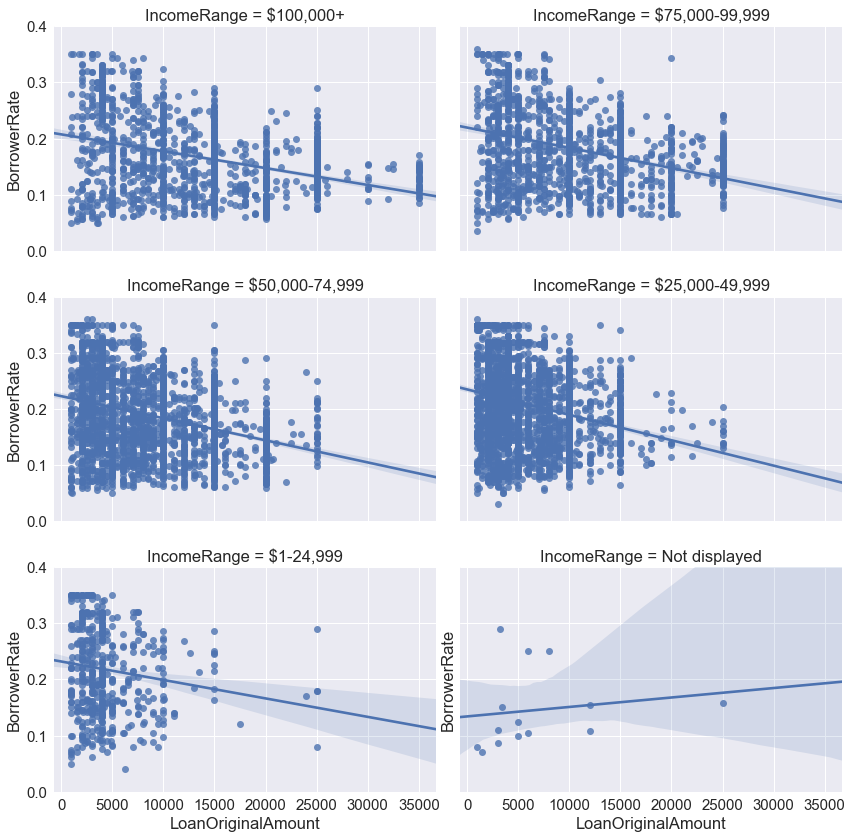

In [1335]:
sample=np.random.choice(loans_noNAN.shape[0],10000, replace=False)
loans_noNAN_subset=loans_noNAN.loc[sample]
IncomeRange_order=[ "$100,000+","$75,000-99,999","$50,000-74,999","$25,000-49,999","$1-24,999","Not displayed" ] 
g=sb.FacetGrid(data=loans_noNAN_subset,col="IncomeRange",col_order=IncomeRange_order,
               size=4, aspect=1.5,palette="colorblind",col_wrap=2)
g=g.map(sb.regplot,"LoanOriginalAmount","BorrowerRate",x_jitter=0.1,fit_reg=True);
g.add_legend()
plt.xlabel("LoanOriginalAmount")
plt.ylim(0,0.40)
plt.ylabel("BorrowerRate");

In gerenral, it could be concluded that, at each particular IncomeRange, by increasing the LoanOriginalAmount, the BorrowerRate decreases. 

Let's take a look at the effect of ProsperScore, the relationship between BorrowerRate and LoanOriginalAmount.

C:\Users\pouya\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  from ipykernel import kernelapp as app


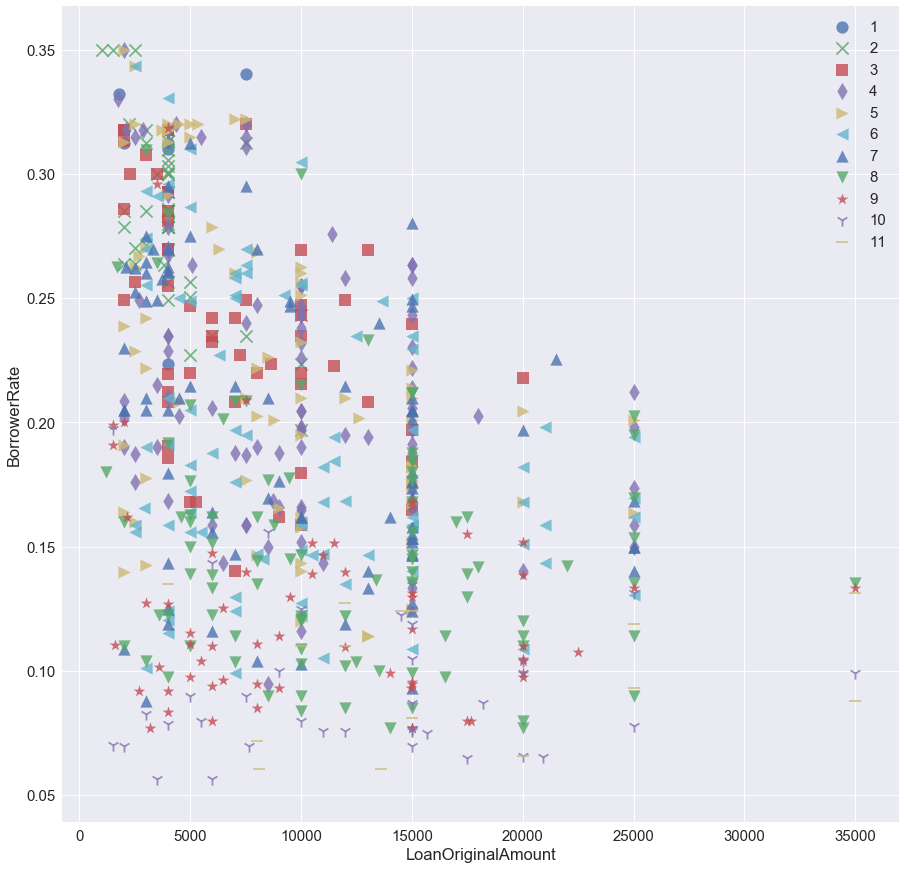

In [1339]:
sample=np.random.choice(loans_noNAN.shape[0],1000, replace=False)
loans_noNAN_subset=loans_noNAN.loc[sample]
loans_noNAN_subset=loans_noNAN_subset.query('ProsperScore!=0')
loans_noNAN_subset=loans_noNAN_subset[~loans_noNAN_subset['ProsperScore'].isnull()]

score_markers=[["1", "o"], ["2", "x"], ["3", "s"], ["4", "d"], ["5", ">"], ["6", "<"], 
               ["7", "^"],["8", "v"], ["9", "*"], ["10", "1"], ["11", "_"]]

fig = plt.figure(figsize = [15,15])
for i, marker in score_markers:
    score=float(i)
    data=loans_noNAN_subset.loc[loans_noNAN_subset["ProsperScore"]==score]
    sb.regplot(data=data, x="LoanOriginalAmount", y="BorrowerRate", 
               x_jitter=0.1, fit_reg=False, marker=marker,scatter_kws={'s':150})

plt.xlabel("LoanOriginalAmount")
plt.ylabel("BorrowerRate");
plt.legend(["1","2","3","4","5","6","7","8","9","10","11"]);

It is somehow clumsy to me. Lets see how this graph looks like using a FacetGrid. In each plot, I will show one one ProsperScore.

C:\Users\pouya\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  from ipykernel import kernelapp as app


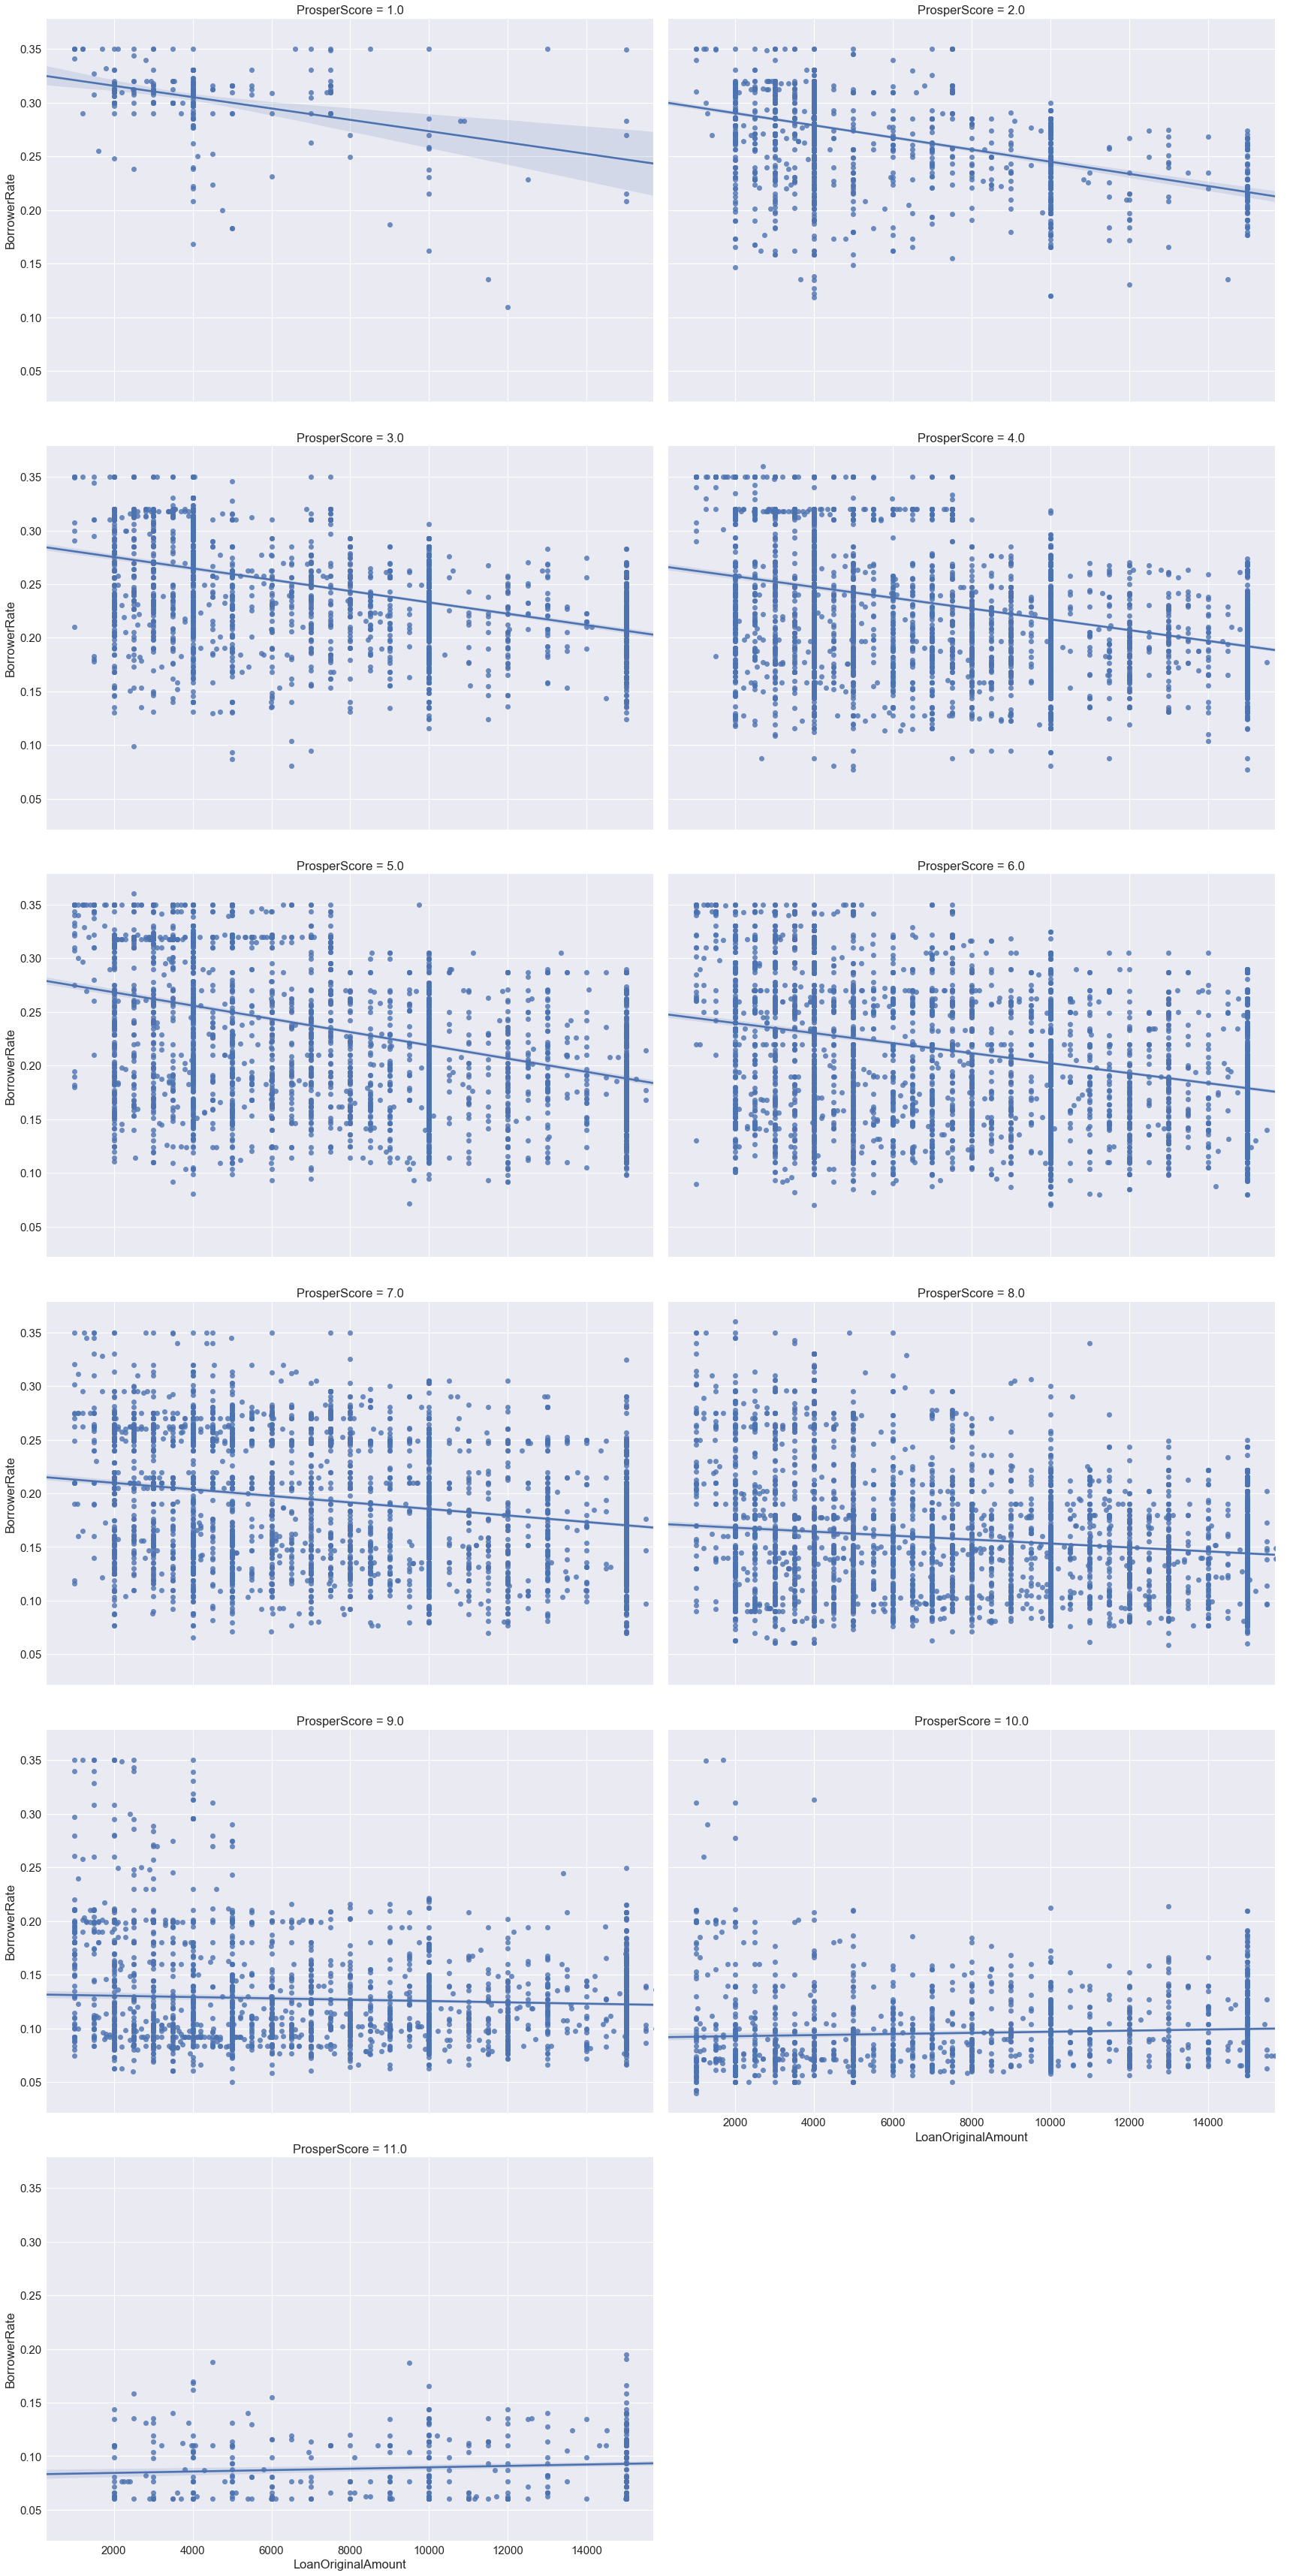

In [1330]:
sample=np.random.choice(loans_noNAN.shape[0],50000, replace=False)
loans_noNAN_subset=loans_noNAN.loc[sample]
#IncomeRange_order=[ "$100,000+","$75,000-99,999","$50,000-74,999","$25,000-49,999","$1-24,999","Not displayed" ] 
#col_order=IncomeRange_order,
g=sb.FacetGrid(data=loans_noNAN_subset,col="ProsperScore",
               size=8, aspect=1.5,palette="colorblind",col_wrap=2)
g=g.map(sb.regplot,"LoanOriginalAmount","BorrowerRate",x_jitter=0.1,fit_reg=True);
g.add_legend()
plt.xlabel("LoanOriginalAmount")
plt.ylabel("BorrowerRate");

In gerenral, at lower ProsperScore (<8), increasing LoanOriginalAmount decreases the BorrowRate. And at higher ProsperScore (>9), the BorrowRate remain s contnstatnt at a low BorrowRate \~0.1

Now lets see, how IncomeRange affect the ProsperScore and BorrowerRate relationship.

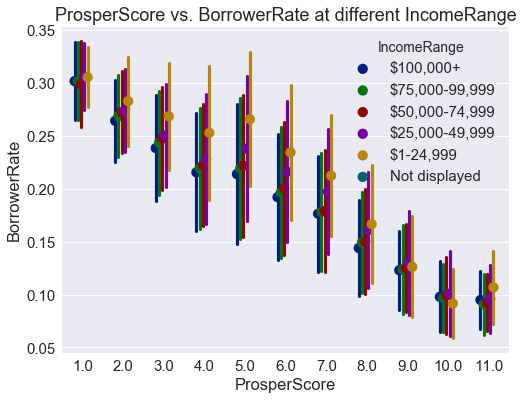

In [1331]:
fig = plt.figure(figsize = [8,6])
IncomeRange_order=[ "$100,000+","$75,000-99,999","$50,000-74,999","$25,000-49,999","$1-24,999","Not displayed" ] 
ax = sb.pointplot(data = loans_noNAN, x = 'ProsperScore', y = 'BorrowerRate', hue = 'IncomeRange',
                  hue_order=IncomeRange_order, palette = 'dark', linestyles = '', dodge = 0.4, ci="sd")# 
plt.title('ProsperScore vs. BorrowerRate at different IncomeRange')
plt.xlabel('ProsperScore')
plt.ylabel('BorrowerRate')
plt.show();

In general, increasing ProsperScore decreases BorrowerRate. Apperntly, people with lower IncomeRange have higher BorrowerRate at each individual ProsperScore. 

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

- TotalCreditLinespast7years does not play a significant role on controling the BorrowerRate and LoanOriginalAmount relationship. 

- At each particular IncomeRange, by increasing the LoanOriginalAmount, the BorrowerRate decreases. Besides, apparently only those who has a IncomeRange above \$100k, are borrowing higher LoanOriginalAmount (\>$25000) and their BorrowerRate is <0.15. 

- Apperntly, people with lower IncomeRange have higher BorrowerRate at each individual ProsperScore.

### Were there any interesting or surprising interactions between features?

- In gerenral, at lower ProsperScore (<8), increasing LoanOriginalAmount decreases the BorrowRate. And at higher ProsperScore (>9), the BorrowRate remain s contnstatnt at a low BorrowRate ~0.1